In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)

We're using TF 2.0.0
We are using Keras 2.3.1


|  Тип задачи   | Функция активации для последнего уровня | Функция потерь |
| ------------- | ------------- | ------------- |
| Бинарная классификация  | sigmoid | binary_crossentropy  |
| Многоклассовая, однозначная  | softmax | categorical_crossentropy |
| Многоклассовая, многозначная  | sigmoid | binary_crossentropy |
| Регрессия   | Нет  | mse  |
| Регрессия [0,1]  | sigmoid   | mse или binary_crossentropy |

# ВВедение

## Mnist(многоклассовая клф)

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_labels.shape)
print(train_images.shape)

(60000,)
(60000, 28, 28)


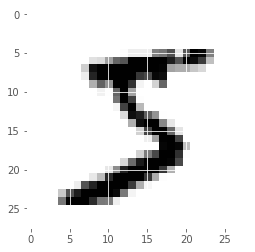

In [4]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [57]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())
#model.compile(optimizer='rmsprop', 
#                loss='categorical_crossentropy',
#                metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.2523 - acc: 0.9275
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1043 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0686 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0502 - acc: 0.9848
Epoch 5/5
10000/10000 [==============================] - 1s 105us/step
test_acc: 0.9788


## The IMDB dataset(бинарная клф)

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

In [4]:
' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#Декодирование отзыва. 
#Обратите внимание, что индексы смещены на 3, потому что индексы 0, 1 и 2 зарезервированы для слов «padding» (отступ), «start of sequence» (начало последовательности) и «unknown» (неизвестно)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
#Кодирование последовательностей целых чисел в бинарную матрицу
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, word in enumerate(sequences):
        results[i, word] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

каждый слой Dense с операцией активации relu реализует следующую цепочку операций с тензорами:
output = relu(dot(W, input) + b)
Наличие 16 скрытых нейронов означает, что весовая матрица W будет иметь форму (input_dimension, 16): скалярное произведение на W спроецирует входные данные в 16-мерное пространство представлений (затем будет произведено сложение с вектором смещений b и выполнена операция relu).

In [35]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,  activation='relu'))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
#l2(0.001) означает, что каждый коэффициент в матрице весов слоя будет добавлять 0.001 * weight_coefficient_value в общее значение потерь сети
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#можно свои лоссы и метрики и оптимайзеры
from keras import losses
from keras import metrics
from keras import optimizers

#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#                loss=losses.binary_crossentropy,
#                metrics=[metrics.binary_accuracy])



W0907 11:08:05.397603  9732 deprecation.py:506] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), verbose = 0)


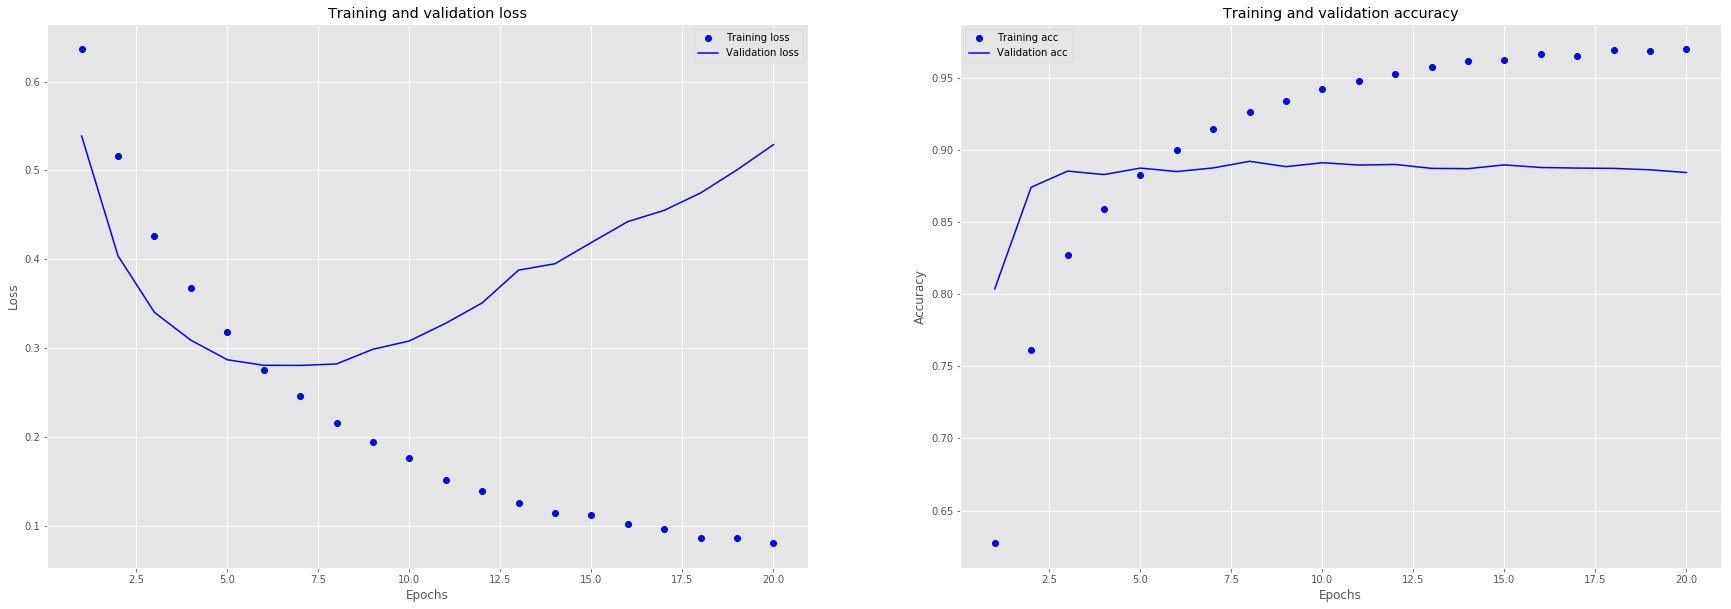

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(121)
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax2 = f.add_subplot(122, title = 'Training and validation accuracy', xlabel = 'Epochs', ylabel = 'Accuracy')

ax.plot(epochs, loss_values, 'bo', label='Training loss')#«bo» означает «blue dot» — «синяя точка»
ax.plot(epochs, val_loss_values, 'b', label='Validation loss')#«b» означает «solid blue line» — «сплошная синяя линия»
ax.legend()

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.legend();

In [38]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 4s 146us/step


[0.5792770400261879, 0.87396]

## Если многоклассовая

In [ ]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
#sparse_categorical_crossentropy можно юзать и не делать one hot таргта
#Для решения подобных задач почти всегда следует использовать функцию потерь categorical_crossentropy. Она минимизирует расстояние между распределениями вероятностей, выводимыми сетью, и истинными распределениями целей.
#последняя строка 46 классов
#В задаче однозначной многоклассовой классификации заключительный слой сети должен иметь функцию активации softmax, чтобы он мог выводить распределение вероятностей между N классами.

## Регрессия

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
#Нормализация данных
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Сеть заканчивается одномерным слоем, не имеющим функции активации (это линейный слой). Это типичная конфигурация для скалярной регрессии (целью которой является предсказание одного значения на непрерывной числовой прямой). Применение функции активации могло бы ограничить диапазон выходных значений: например, если в последнем слое применить функцию активации sigmoid, сеть обучилась бы предсказывать только значения из диапазона между 0 и 1. В данном случае, с линейным последним слоем, сеть способна предсказывать значения из любого диапазона.

In [4]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [27]:
#Оценка решения методом перекрестной проверки по K блокам, тк данных мало
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

In [28]:
for i in range(k): 
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=16, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


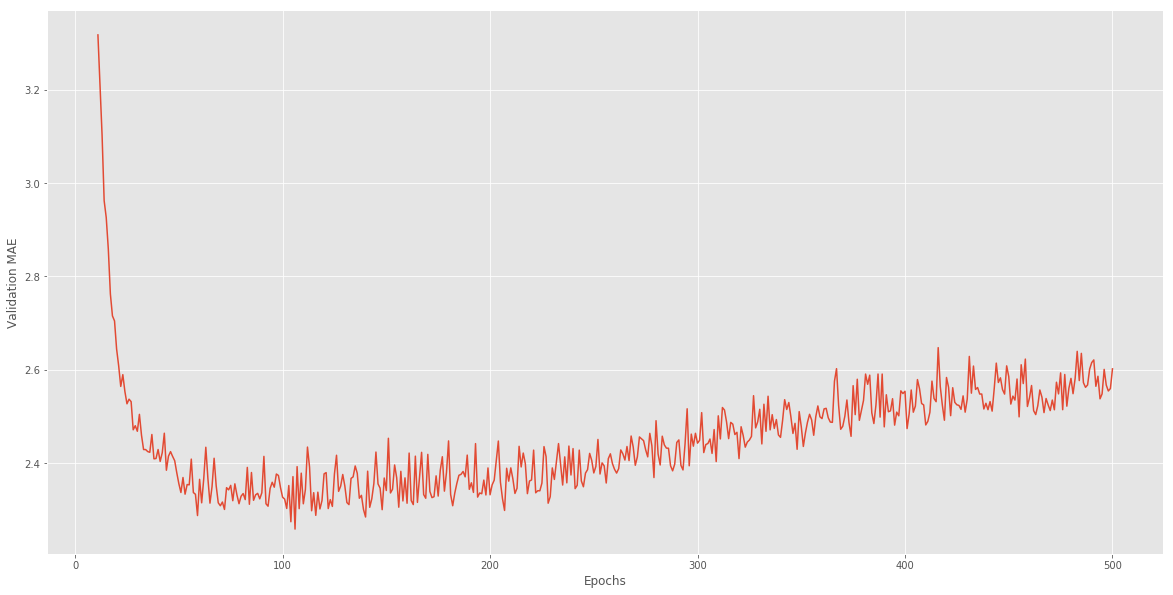

In [61]:
average_mae_history = np.mean([[hist[i] for i in range(num_epochs)] for hist in all_mae_histories], axis = 0)
plt.figure(figsize=(20,10))
plt.plot(range(11, len(average_mae_history) + 1), average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

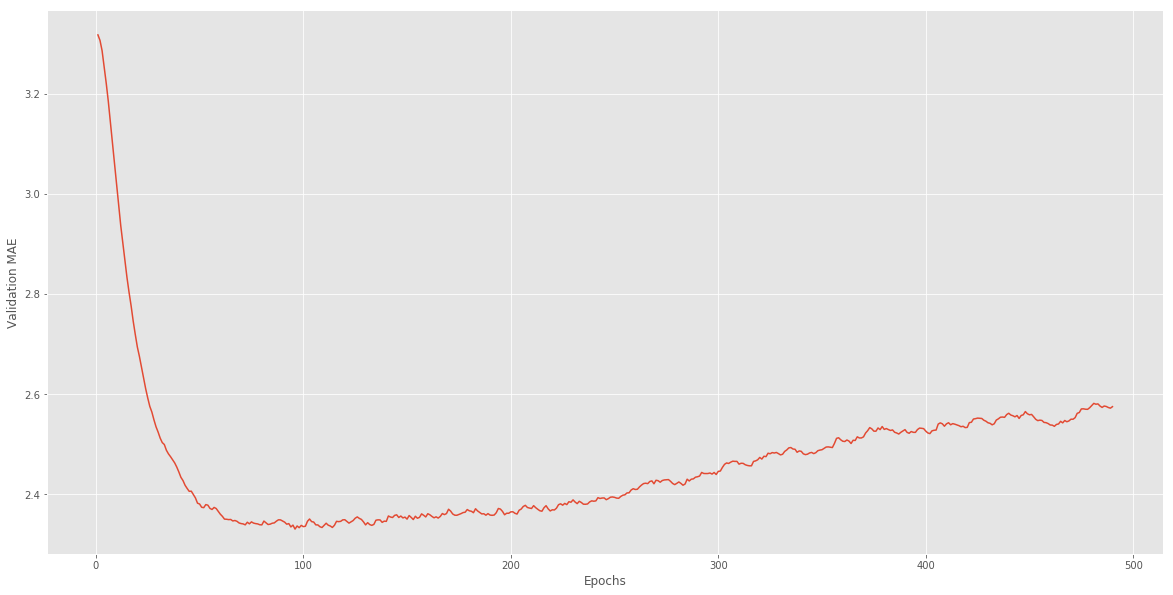

In [60]:
#опустим первые 10 замеров, которые имеют другой масштаб, отличный от масштаба остальной кривой;
#заменим каждую оценку экспоненциальным скользящим средним по предыдущим оценкам, чтобы получить более гладкую кривую.

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]#последняя
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.figure(figsize=(20,10))
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [64]:
model = build_model() 
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 2ms/step


2.5089354421578203

# Картинки, conv layers

## Mnist(многоклассовая клф) + conv

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [14]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#в слой конв можно передать padding = same", тогда получится исходная размерность(для окна 3 на 3 добавиься по 1 клетке с каждой стороны)
#зачем maxpooling? если не делать его, то Окна 3 × 3 в третьем слое содержат только информацию, поступающую из окон 7 × 7 в исходных данных. Высокоуровневые шаблоны, изученные с помощью сверточной нейронной сети, будут слишком малы в сравнении с начальными данными, чего может оказаться недостаточно для обучения классификации цифр (попробуйте распознать цифру, посмотрев на нее через окна 7 × 7 пикселов!). Нам нужно, чтобы признаки, полученные от последнего сверточного слоя, содержали информацию о совокупности исходных данных.
#Заключительная карта признаков имеет 22 × 22 × 64 = 30 976 коэффициентов на образец. Это очень много. Если бы вы решили сделать ее плоской, чтобы наложить сверху слой Dense размером 512, этот слой имел бы 15,8 миллиона параметров. Это слишком много для такой маленькой модели и в результате приведет к интенсивному переобучению.

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                36928     
__________

In [16]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

Epoch 1/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.1734 - acc: 0.9462
Epoch 2/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0491 - acc: 0.9849
Epoch 3/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0324 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0252 - acc: 0.9920
Epoch 5/5
10000/10000 [==============================] - 1s 64us/step


0.9916

## Обучение сверточной нейронной сети с нуля на небольшом наборе данных. Dogs vs. Cats

Сначала мы обучим маленькую сверточную нейронную сеть на 2000 обучающих образцах без применения регуляризации, чтобы задать базовый уровень достижимого. Она даст нам точность классификации 71 %.

Затем вашему вниманию будет представлен эффективный способ уменьшения степени переобучения в распознавании образов — расширение данных (data augmentation). С его помощью мы повысим точность классификации до 82 %.
В следующем разделе мы рассмотрим еще два основных приема глубокого обучения на небольших наборах данных: выделение признаков с использованием предварительно обученной сети (поможет поднять точность с 90 до 96 %) и дообучение предварительно обученной сети (поможет достичь окончательной точности в 97 %).

In [2]:
#import os, shutil
#original_dataset_dir = 'C:/Users/Kostya/python scripts/Data/dogs-vs-cats/train'
#base_dir = 'C:/Users/Kostya/python scripts/Data/cats_and_dogs_small'

In [2]:
import os, shutil
original_dataset_dir = 'C:/Users/Kostya/python scripts/Data/dogs-vs-cats/train'
base_dir = 'C:/Users/Kostya/python scripts/Data/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') 
#os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation') 
#os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir) 
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
#Использование ImageDataGenerator для чтения изображений из каталогов
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,# Целевой каталог 
                                  target_size=(150, 150),# Привести все изображения к размеру 150 × 150 
                                  batch_size=20,
                                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,# Целевой каталог 
                                  target_size=(150, 150),# Привести все изображения к размеру 150 × 150 
                                  batch_size=20,
                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
# обучение модели на генераторе
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,##после извлечения 100 пакетов из генератора модель перейдет на след эпоху 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50, ## может извлекать бесконечно, передаем сколько пакетов извлекаем
    verbose=0
    )

model.save('cats_and_dogs_small_1.h5')

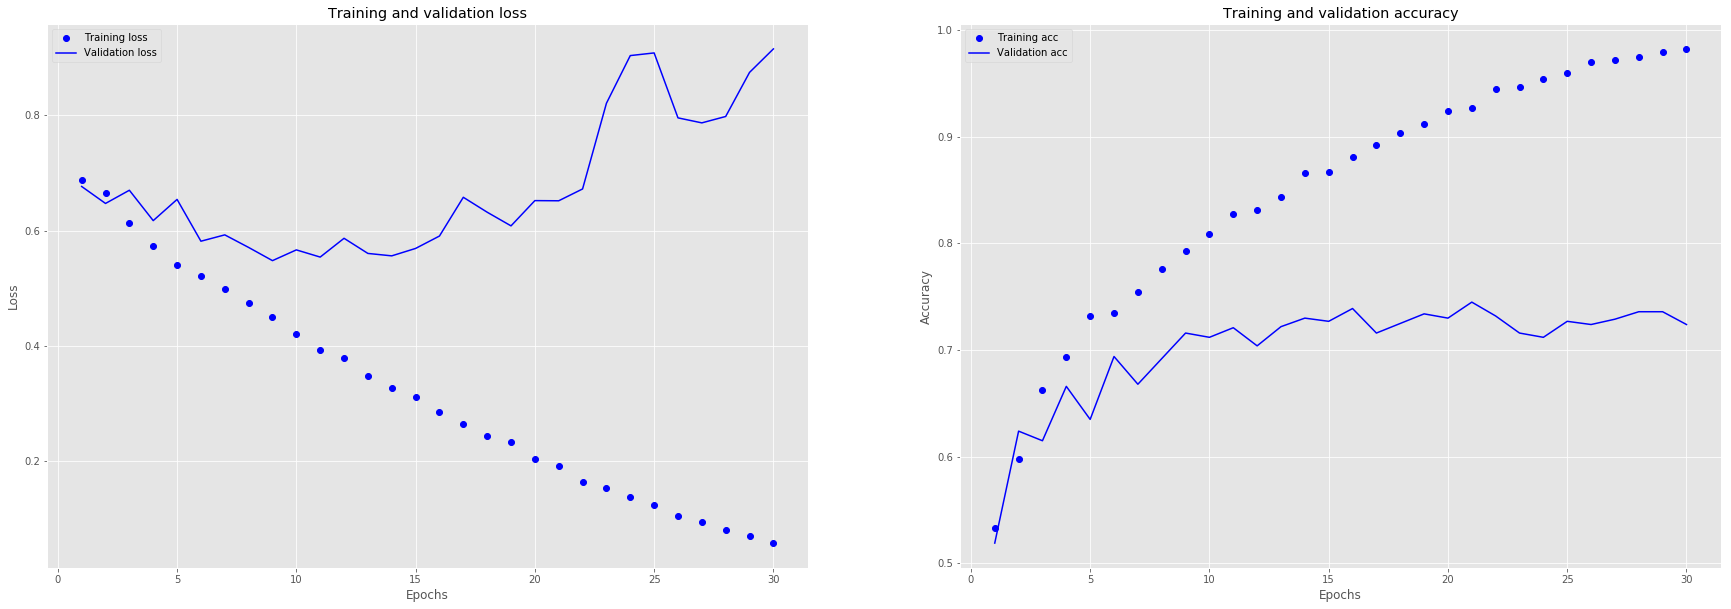

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(121)
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax2 = f.add_subplot(122, title = 'Training and validation accuracy', xlabel = 'Epochs', ylabel = 'Accuracy')

ax.plot(epochs, loss_values, 'bo', label='Training loss')#«bo» означает «blue dot» — «синяя точка»
ax.plot(epochs, val_loss_values, 'b', label='Validation loss')#«b» означает «solid blue line» — «сплошная синяя линия»
ax.legend()

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.legend();

На графиках четко наблюдается эффект переобучения. Точность на обучающих данных линейно растет и приближается к 100 %, тогда как точность на проверочных данных останавливается на отметке 70–72 %. Потери на этапе проверки достигают минимума всего после пяти эпох и затем замирают, а потери на этапе обучения продолжают линейно уменьшаться, почти достигая 0.

## Расширение данных

Прием расширения данных реализует подход создания дополнительных обучающих данных из имеющихся путем трансформации образцов множеством случайных преобразований, дающих правдоподобные изображения. Цель состоит в том, чтобы на этапе обучения модель никогда не увидела одно и то же изображение дважды. Это поможет модели выявить больше особенностей данных и достичь лучшей степени обобщения.
Сделать это в Keras можно путем настройки ряда случайных преобразований для изображений, читаемых экземпляром ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(
    rotation_range=40, #rotation_range — величина в градусах (0–180), диапазон, в котором будет осуществляться случайный поворот изображения;
    width_shift_range=0.2, #диапазоны (в долях ширины и высоты), в пределах которых изображения смещаются по горизонтали и вертикали соответственно;
    height_shift_range=0.2, #диапазоны (в долях ширины и высоты), в пределах которых изображения смещаются по горизонтали и вертикали соответственно;
    shear_range=0.2, #для случайного применения сдвигового (shearing) преобразования;
    zoom_range=0.2, #для случайного изменения масштаба внутри изображений;
    horizontal_flip=True,#для случайного переворачивания половины изображения по горизонтали — подходит в случае отсутствия предположений о горизонтальной асимметрии (например, в изображениях реального мира);
    fill_mode='nearest' #стратегия заполнения вновь созданных пикселов, появляющихся после поворота или смещения по горизонтали/вертикали.
    )

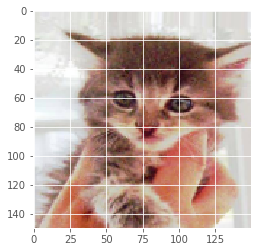

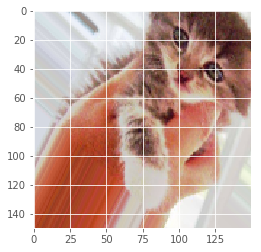

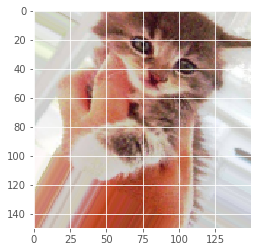

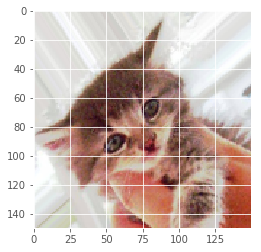

In [5]:
from keras.preprocessing import image 
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1): 
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        plt.show()

In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

W1015 22:13:35.176289  3156 deprecation.py:506] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, #rotation_range — величина в градусах (0–180), диапазон, в котором будет осуществляться случайный поворот изображения;
    width_shift_range=0.2, #диапазоны (в долях ширины и высоты), в пределах которых изображения смещаются по горизонтали и вертикали соответственно;
    height_shift_range=0.2, #диапазоны (в долях ширины и высоты), в пределах которых изображения смещаются по горизонтали и вертикали соответственно;
    shear_range=0.2, #для случайного применения сдвигового (shearing) преобразования;
    zoom_range=0.2, #для случайного изменения масштаба внутри изображений;
    horizontal_flip=True,#для случайного переворачивания половины изображения по горизонтали — подходит в случае отсутствия предположений о горизонтальной асимметрии (например, в изображениях реального мира);
    #fill_mode='nearest' #стратегия заполнения вновь созданных пикселов, появляющихся после поворота или смещения по горизонтали/вертикали.
    )

test_datagen = ImageDataGenerator(rescale=1./255)#проверочные данные не требуется расширять!

train_generator = train_datagen.flow_from_directory(train_dir,# Целевой каталог 
                                  target_size=(150, 150),# Привести все изображения к размеру 150 × 150 
                                  batch_size=32,
                                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,# Целевой каталог 
                                  target_size=(150, 150),# Привести все изображения к размеру 150 × 150 
                                  batch_size=32,
                                  class_mode='binary')

# обучение модели на генераторе
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,##после извлечения 100 пакетов из генератора модель перейдет на след эпоху 
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50, ## может извлекать бесконечно, передаем сколько пакетов извлекаем
    verbose=0
    )

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


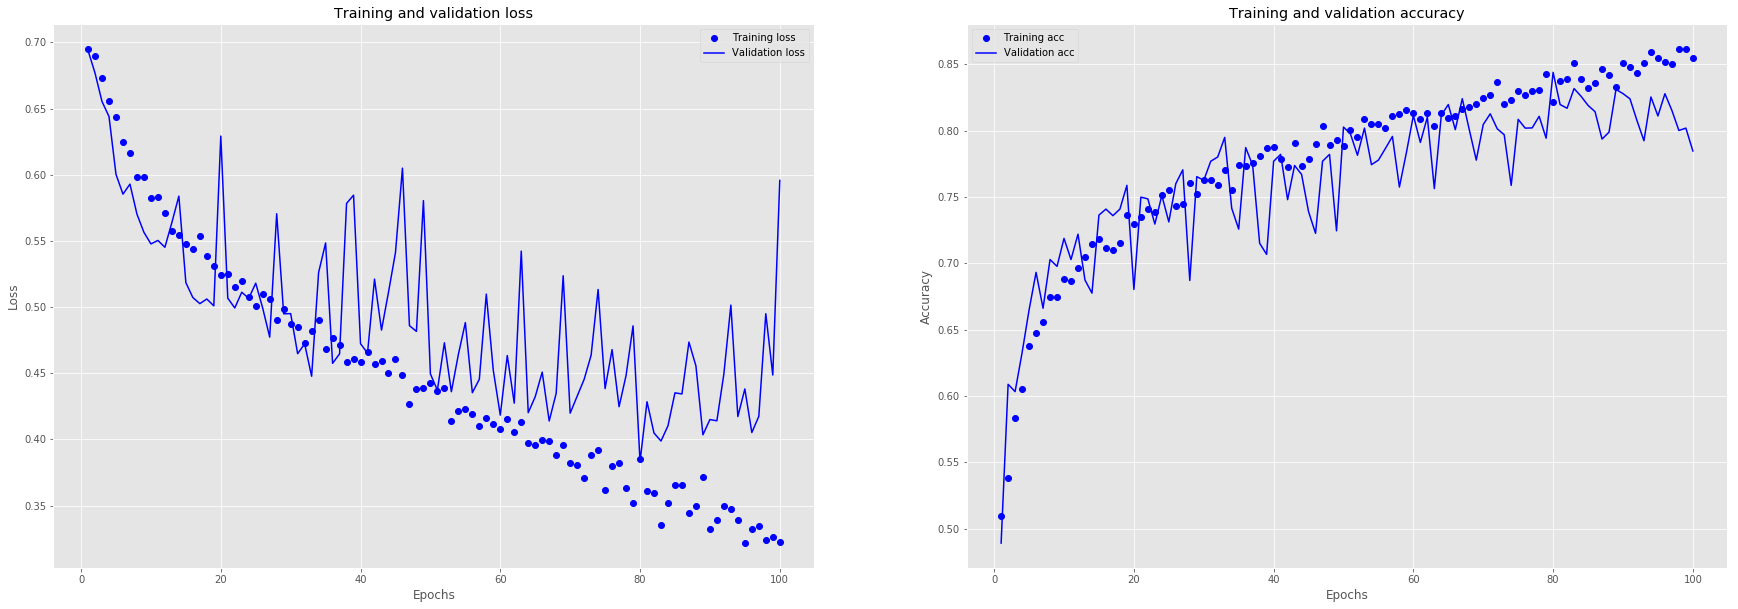

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(121)
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax2 = f.add_subplot(122, title = 'Training and validation accuracy', xlabel = 'Epochs', ylabel = 'Accuracy')

ax.plot(epochs, loss_values, 'bo', label='Training loss')#«bo» означает «blue dot» — «синяя точка»
ax.plot(epochs, val_loss_values, 'b', label='Validation loss')#«b» означает «solid blue line» — «сплошная синяя линия»
ax.legend()

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.legend();

## Использование предварительно обученной сверточной нейронной сети

Есть два приема использования предварительно обученных сетей: выделение признаков (feature extraction) и дообучение (fine-tuning).

Выделение признаков заключается в использовании представлений, изученных предыдущей сетью, для выделения признаков из новых образцов, которые затем пропускаются через новый классификатор, обучаемый с нуля.
Как было показано выше, сверточные нейронные сети, используемые для классификации изображений, состоят из двух частей: они начинаются с последовательности слоев выбора значений и свертки и заканчиваются полносвязным классификатором. Первая часть называется сверточной основой (convolutional base) модели. В случае со сверточными нейронными сетями процесс выделения признаков заключается в том, чтобы взять сверточную основу предварительно обученной сети, пропустить через нее новые данные и на основе вывода обучить новый классификатор 
Причина в том, что представления, полученные сверточной основой, обычно более универсальны, а значит, более пригодны для повторного использования: карты признаков сверточной нейронной сети — это карты присутствия на изображениях обобщенных понятий, которые могут пригодиться независимо от конкретной задачи распознавания образов. Но представления, изученные классификатором, обязательно будут характерны для набора классов, на котором обучалась модель, — они будут содержать только информацию о вероятности присутствия того или иного класса на изображении.

Отметим также, что уровень обобщенности (и, соответственно, пригодности к повторному использованию) представлений, выделенных конкретными сверточными слоями, зависит от глубины слоя в модели. Слои, следующие первыми, выделяют локальные, наиболее обобщенные карты признаков (таких, как визуальные границы, цвет и текстура), тогда как слои, располагающиеся дальше (или выше), выделяют более абстрактные понятия (такие, как «глаз кошки» или «глаз собаки»). Поэтому, если новый набор данных существенно отличается от набора, на котором обучалась оригинальная модель, возможно большего успеха можно добиться, если использовать только несколько первых слоев модели, а не всю сверточную основу.

Модель VGG16 входит в состав фреймворка Keras. Ее можно импортировать из модуля keras.applications. Вот список моделей классификации изображений (все они предварительно обучены на наборе ImageNet), доступных в keras .applications:

Xception

Inception V3

ResNet50

VGG16

VGG19

MobileNet


## feature extraction

In [3]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', #Аргумент weights определяет источник весов для инициализации модели.
    include_top=False,#Аргумент include_top определяет необходимость подключения к сети полносвязного классификатора.
    #По умолчанию этот полносвязный классификатор соответствует 1000 классов из ImageNet.
    #Так как мы намереваемся использовать свой полносвязный классификатор (только с двумя классами: cat и dog), мы не будем подключать его.
    input_shape=(150, 150, 3))
conv_base.summary()

W1020 12:03:16.818219 10720 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1020 12:03:16.849135 10720 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1020 12:03:16.849135 10720 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1020 12:03:16.864771 10720 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1020 12:03:17.130413 10720 deprecation_wrapper.py:119] From C:\Users\Kosty

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

Заключительная карта признаков имеет форму (4, 4, 512). Поверх нее мы положим полносвязный классификатор.
Далее можно пойти двумя путями:

1)Пропустить наш набор данных через сверточную основу, записать получившийся массив Numpy на диск и затем использовать его как входные данные для отдельного, полносвязного классификатора, похожего на тот, что мы видели в первой части книги. Это быстрое и незатратное решение, потому что требует запускать сверточную основу только один раз для каждого входного изображения, а сверточная основа — самая дорогостоящая часть конвейера. Однако по той же причине этот прием не позволит использовать прием расширения данных.

2)Дополнить имеющуюся модель (conv_base) слоями Dense и пропустить все входные данные. Этот путь позволяет использовать расширение данных, потому что каждое изображение проходит через сверточную основу каждый раз, когда попадает в модель. Однако по той же причине этот путь намного более затратный, чем первый.

### 1

In [8]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
    
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1 
        if i * batch_size >= sample_count:
            break 
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 521us/step - loss: 0.5862 - acc: 0.6875 - val_loss: 0.4397 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 1s 351us/step - loss: 0.4135 - acc: 0.8225 - val_loss: 0.3792 - val_acc: 0.8400
Epoch 3/30
2000/2000 [==============================] - 1s 351us/step - loss: 0.3507 - acc: 0.8525 - val_loss: 0.3227 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 1s 351us/step - loss: 0.3136 - acc: 0.8730 - val_loss: 0.2976 - val_acc: 0.8920
Epoch 5/30
2000/2000 [==============================] - 1s 359us/step - loss: 0.2819 - acc: 0.8920 - val_loss: 0.2808 - val_acc: 0.8940
Epoch 6/30
2000/2000 [==============================] - 1s 351us/step - loss: 0.2631 - acc: 0.8960 - val_loss: 0.2836 - val_acc: 0.8850
Epoch 7/30
2000/2000 [==============================] - 1s 358us/step - loss: 0.2487 - acc: 0.9020 - val_loss: 0.2637 - val_acc: 0.9030


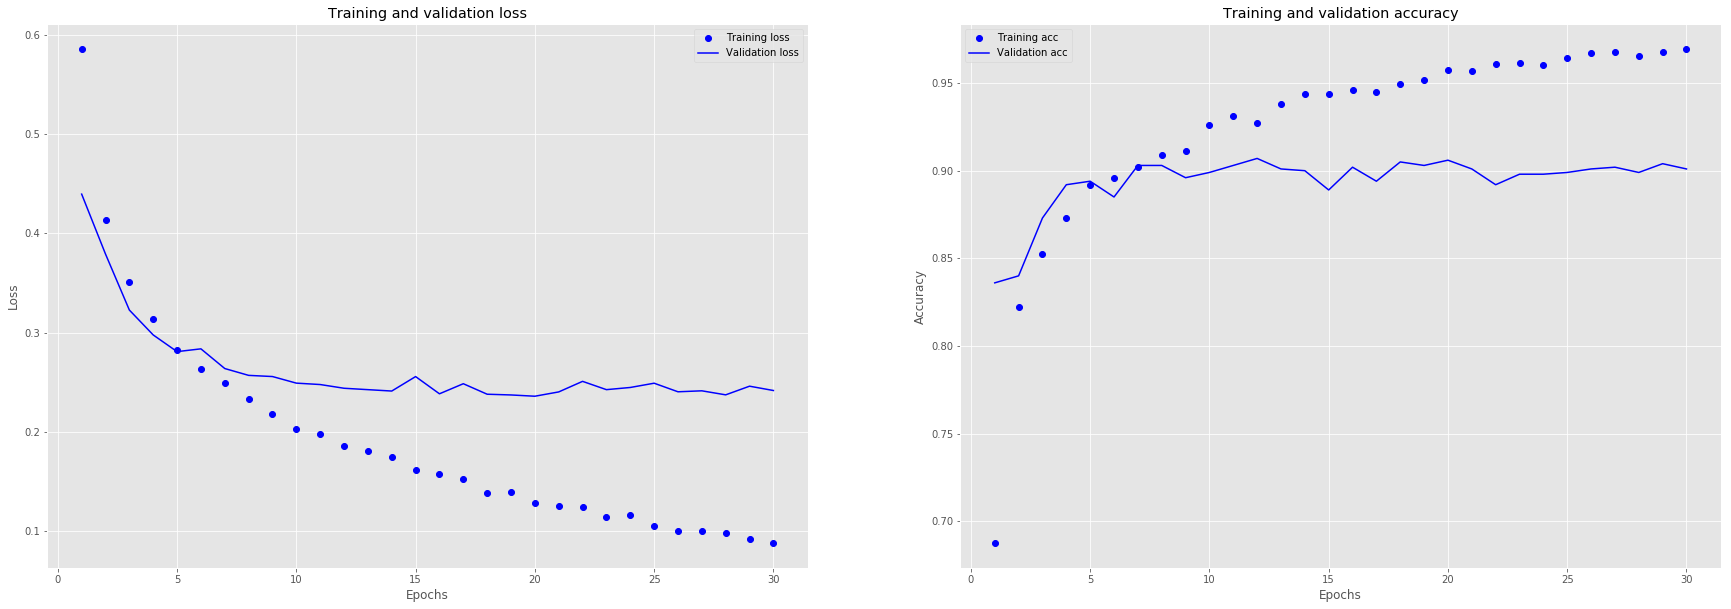

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(121)
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax2 = f.add_subplot(122, title = 'Training and validation accuracy', xlabel = 'Epochs', ylabel = 'Accuracy')

ax.plot(epochs, loss_values, 'bo', label='Training loss')#«bo» означает «blue dot» — «синяя точка»
ax.plot(epochs, val_loss_values, 'b', label='Validation loss')#«b» означает «solid blue line» — «сплошная синяя линия»
ax.legend()

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.legend();

### 2

Добавление полносвязного классификатора поверх сверточной основы

Перед компиляцией и обучением модели очень важно заморозить сверточную основу. Замораживание одного или нескольких слоев предотвращает изменение весовых коэффициентов в них в процессе обучения. Если этого не сделать, тогда представления, прежде изученные сверточной основой, изменятся в процессе обучения на новых данных. Так как слои Dense сверху инициализируются случайными значениями, в сети могут произойти существенные изменения весов, фактически разрушив представления, полученные ранее.

В этом случае обучению будут подвергаться только веса из двух вновь добавленных слоев Dense, то есть всего четыре весовых тензора: по два на слой (главная весовая матрица и вектор смещений)

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

W1020 10:24:23.620854  1908 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1020 10:24:23.636461  1908 deprecation.py:323] From C:\Users\Kostya\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30
100/100 [==============================] - 39s 395ms/step - loss: 0.6040 - acc: 0.6730 - val_loss: 0.4523 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 16s 156ms/step - loss: 0.4813 - acc: 0.7820 - val_loss: 0.3756 - val_acc: 0.8400
Epoch 3/30
100/100 [==============================] - 16s 157ms/step - loss: 0.4357 - acc: 0.8075 - val_loss: 0.3349 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 16s 158ms/step - loss: 0.4067 - acc: 0.8215 - val_loss: 0.3132 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 16s 157ms/step - loss: 0.3831 - acc: 0.8265 - val_loss: 0.2955 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 16s 157ms/step - loss: 0.3692 - acc: 0.8490 - val_loss: 0.2973 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 16s 156ms/step - loss: 0.3569 - acc: 0.8405 - val_loss: 0.3017 - val_acc: 0.8770
Epoch 8/30
100/100 [==============================] - 

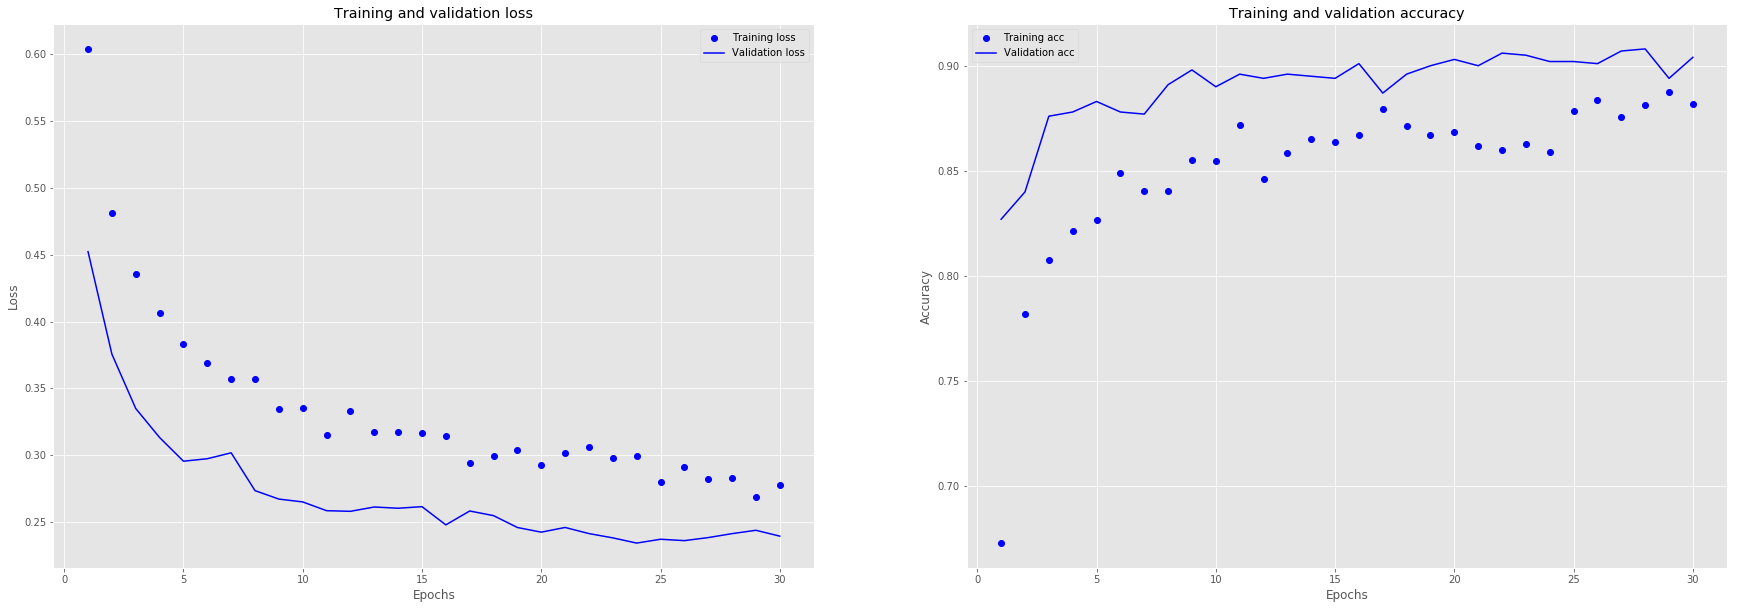

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(121)
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax2 = f.add_subplot(122, title = 'Training and validation accuracy', xlabel = 'Epochs', ylabel = 'Accuracy')

ax.plot(epochs, loss_values, 'bo', label='Training loss')#«bo» означает «blue dot» — «синяя точка»
ax.plot(epochs, val_loss_values, 'b', label='Validation loss')#«b» означает «solid blue line» — «сплошная синяя линия»
ax.legend()

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.legend();

## Дообучение (fine-tuning)

Другой широко используемый прием повторного использования модели, дополняющий выделение признаков, — дообучение (fine-tuning) (рис. 5.19). Дообучение заключается в размораживании нескольких верхних слоев замороженной модели, которая использовалась для выделения признаков, и совместном обучении вновь добавленной части модели (в данном случае полносвязного классификатора) и этих верхних слоев. Этот прием называется дообучением, поскольку немного корректирует наиболее абстрактные представления в повторно используемой модели, чтобы сделать их более актуальными для данной задачи.

Почему бы не дообучить больше слоев? Почему бы не дообучить всю сверточную основу? Так можно поступить, но имейте в виду следующее.

Начальные слои в сверточной основе кодируют более обобщенные признаки, пригодные для повторного использования, а более высокие слои кодируют более конкретные признаки. Намного полезнее донастроить более конкретные признаки, потому что именно их часто нужно перепрофилировать для решения новой задачи. Ценность дообучения нижних слоев быстро падает с их глубиной.

Чем больше параметров обучается, тем выше риск переобучения. Сверточная основа имеет 15 миллионов параметров, поэтому было бы слишком рискованно пытаться дообучить ее целиком на нашем небольшом наборе данных.
То есть в данной ситуации лучшей стратегией будет дообучить только верхние два-три слоя сверточной основы.

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [9]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')


from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose = 1,
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 180ms/step - loss: 0.1843 - acc: 0.9425 - val_loss: 0.1582 - val_acc: 0.9350
Epoch 2/100
100/100 [==============================] - 16s 165ms/step - loss: 0.0799 - acc: 0.9700 - val_loss: 0.1547 - val_acc: 0.9350
Epoch 3/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0625 - acc: 0.9775 - val_loss: 0.2113 - val_acc: 0.9240
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0565 - acc: 0.9790 - val_loss: 0.3454 - val_acc: 0.9100
Epoch 5/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0480 - acc: 0.9825 - val_loss: 0.1719 - val_acc: 0.9380
Epoch 6/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0355 - acc: 0.9900 - val_loss: 0.1815 - val_acc: 0.9380
Epoch 7/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0356 - acc: 0.9875 -

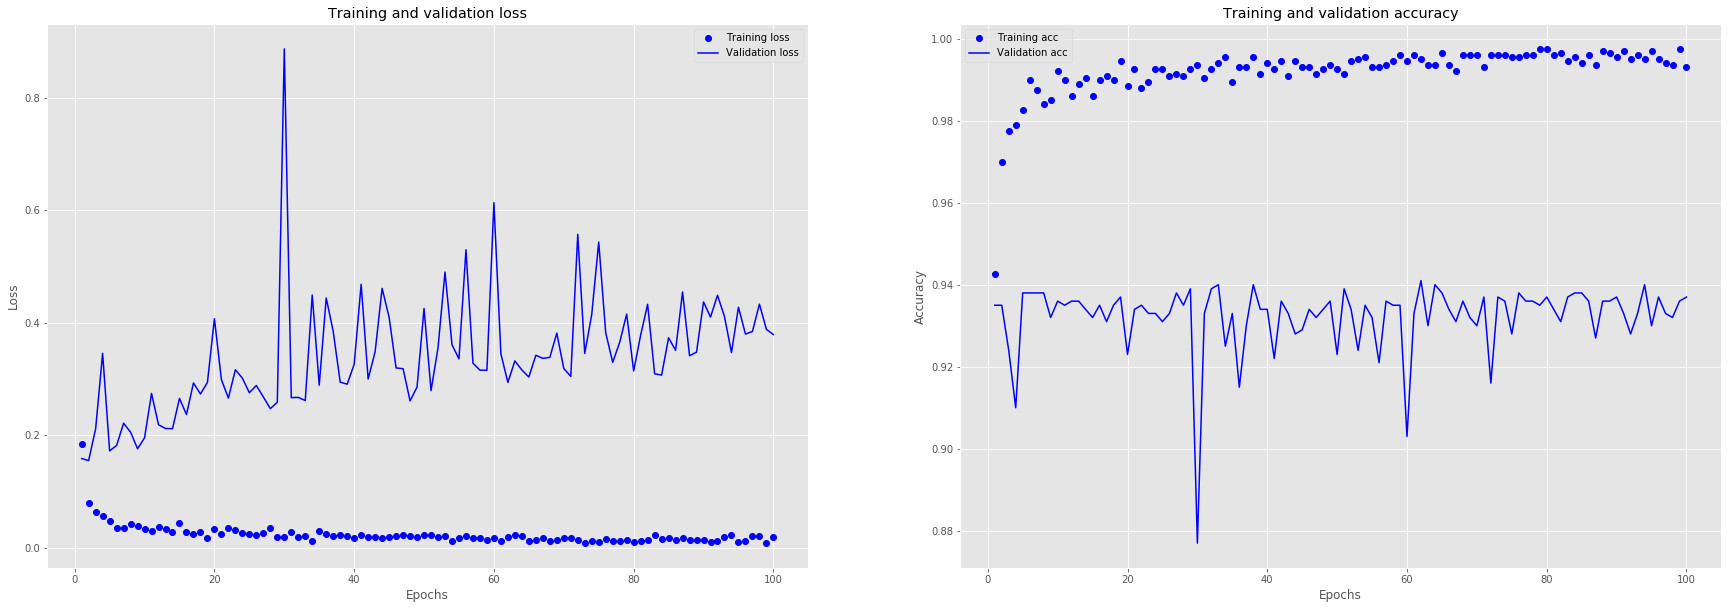

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(121)
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax2 = f.add_subplot(122, title = 'Training and validation accuracy', xlabel = 'Epochs', ylabel = 'Accuracy')

ax.plot(epochs, loss_values, 'bo', label='Training loss')#«bo» означает «blue dot» — «синяя точка»
ax.plot(epochs, val_loss_values, 'b', label='Validation loss')#«b» означает «solid blue line» — «сплошная синяя линия»
ax.legend()

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.legend();

## Визуализация знаний, заключенных в сверточной нейронной сети


1)визуализация промежуточных выводов сверточной нейронной сети (промежуточных активаций) — помогает понять, как последовательность слоев сети преобразует свои входные данные, а также показывает смысл отдельных фильтров;


2)визуализация фильтров сверточной нейронной сети — помогает точно узнать, за какой визуальный шаблон или понятие отвечает каждый фильтр;


3)визуализация тепловых карт активации класса в изображении — помогает понять, какие части изображения идентифицируют принадлежность к заданному классу, что позволяет выявлять объекты на изображениях.

### 1 Визуализация промежуточных активаций


In [2]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

W1103 14:10:14.578691  8632 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1103 14:10:14.885203  8632 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1103 14:10:14.953257  8632 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1103 14:10:14.995085  8632 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1103 14:10:14.996085  8632 deprecation_wrapper.py:119] From C:\Users\Kost

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

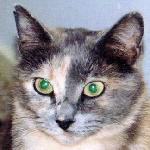

In [8]:
img_path = 'C:/Users/Kostya/python scripts/Data/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(150, 150))
img

In [13]:
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0) #добавление оси
print(img_tensor.shape)
img_tensor /= 255. #Модель обучалась на входных данных, которые предварительно были обработаны таким способом

(150, 150, 3)
(1, 150, 150, 3)


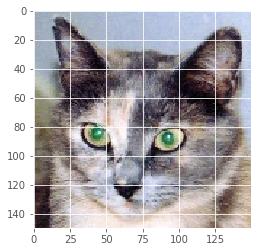

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [22]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Если передать этой модели изображение, она вернет значения активации слоев в исходной модели. Это первый пример модели с несколькими выходами в данной книге: до сих пор все представленные выше модели имели ровно один вход и один выход. Вообще модель может иметь сколько угодно входов и выходов. В частности, данная модель имеет один вход и восемь выходов: по одному на каждую активацию слоя

In [27]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 148, 148, 32)


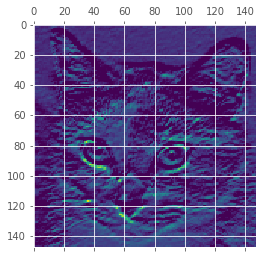

In [44]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')

In [53]:
activations[5].shape

(1, 17, 17, 128)

Визуализация всех каналов для всех промежуточных активаций

In [1]:
#layer_names = [] 
#for layer in model.layers[:8]:
#    layer_names.append(layer.name)
#    
#images_per_row = 16
#for layer_name, layer_activation in zip(layer_names, activations):
#    n_features = layer_activation.shape[-1]
#    size = layer_activation.shape[1]
#    
#    n_cols = n_features // images_per_row
#    display_grid = np.zeros((size * n_cols, images_per_row * size))
#    
#    for col in range(n_cols):
#        for row in range(images_per_row):
#            channel_image = layer_activation[0, :, :, col * images_per_row + row] 
#            channel_image -= channel_image.mean()
#            channel_image /= channel_image.std()
#            channel_image *= 64 
#            channel_image += 128 
#            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#            display_grid[col * size : (col + 1) * size,
#                         row * size : (row + 1) * size] = channel_image
#            scale = 1. / size
#            plt.figure(figsize=(scale * display_grid.shape[1],
#                                scale * display_grid.shape[0]))
#            plt.title(layer_name)
#            plt.grid(False)
#            plt.imshow(display_grid, aspect='auto', cmap='viridis')

### 2 Визуализация фильтров сверточных нейронных сетей

### 3 Визуализация тепловых карт активации класса

В этом разделе описывается еще один прием визуализации, позволяющий понять, какие части данного изображения помогли сверточной нейронной сети принять окончательное решение о его классификации. Это полезно для отладки процесса принятия решений в сверточной нейронной сети, особенно в случае ошибок классификации. Он также помогает определить местоположение конкретных объектов на изображении.

Категория методов, описываемых здесь, называется визуализацией карты активации класса (Class Activation Map, CAM). Их суть заключается в создании тепловых карт активации класса для входных изображений.Тепловая карта активации класса — это двумерная сетка оценок, связанных с конкретным выходным классом и вычисляемых для каждого местоположения в любом входном изображении. Эти оценки определяют, насколько важно каждое местоположение для рассматриваемого класса.



In [3]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

W1104 18:06:30.246959 13400 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1104 18:06:30.263973 13400 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1104 18:06:30.266964 13400 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1104 18:06:30.288969 13400 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 1355s 2us/step


W1104 18:29:07.220189 13400 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1104 18:29:07.221180 13400 deprecation_wrapper.py:119] From C:\Users\Kostya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



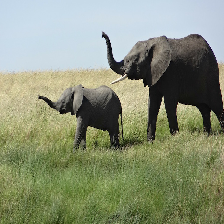

In [5]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = 'C:/Users/Kostya/python scripts/Data/cats_and_dogs_small/creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [6]:
x = image.img_to_array(img) #Массив Numpy с числами типа float32, имеющий форму (224, 224, 3)
x = np.expand_dims(x, axis=0) #Добавление размерности для преобразования массива в пакет с формой (1, 224, 224, 3)
x = preprocess_input(x) # Предварительная обработка пакета (нормализация каналов цвета)


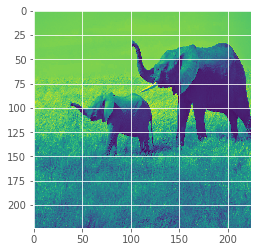

In [20]:
plt.imshow(image.img_to_array(img)[:,:,0])

In [7]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.9094213), ('n01871265', 'tusker', 0.08618258), ('n02504013', 'Indian_elephant', 0.004354576)]


Для визуализации части изображения, наиболее соответствующей классу «африканский слон», выполним процедуру Grad-CAM.

In [27]:
np.argmax(preds[0])

386

In [42]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')


In [51]:
from keras import backend as K
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
#Градиент класса «африканский слон» для выходной карты признаков слоя block5_conv3
pooled_grads = K.mean(grads, axis=(0, 1, 2))
#Вектор с формой (512,), каждый элемент которого определяет интенсивность градиента для заданного канала в карте признаков

In [64]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
#Позволяет получить доступ к значениям только что определенных величин: pooled_grads и выходной карте признаков слоя block5_conv3 для заданного изображения
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    #Умножает каждый канал в карте признаков на «важность этого канала» для класса «слон»
heatmap = np.mean(conv_layer_output_value, axis=-1)

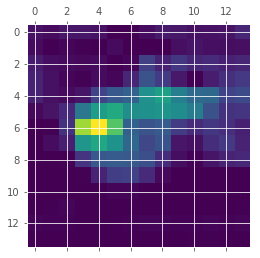

In [66]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [79]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap) #Преобразование тепловой карты в формат RGB
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('C:/Users/Kostya/python scripts/Data/cats_and_dogs_small/creative_commons_elephant_2.jpg', superimposed_img)

True

Почему сеть решила, что на фотографии изображен африканский слон?

Где на фотографии находится африканский слон?
Интересно отметить, что уши слоненка оказались сильно активированы: вероятно, именно по этому признаку сеть отличает африканских слонов от индийских.

# Работа с текстовыми данными

Векторизация текста — это процесс преобразования текста в числовые тензоры. Ее можно выполнить несколькими способами:


разбить текст на слова и преобразовать каждое слово в вектор;


разбить текст на символы и преобразовать каждый символ в вектор;


извлечь n-граммы из слов или символов и преобразовать каждую n-грамму в вектор. N-граммы — это перекрывающиеся группы из нескольких последовательных слов или символов.

Также его можно разложить на такой набор 3-грамм2:

{"The", "The cat", "cat", "cat sat", "The cat sat",
"sat", "sat on", "on", "cat sat on", "on the", "the",
"sat on the", "the mat", "mat", "on the mat"}

Такие наборы называют мешком биграмм или мешком триграмм соответственно. Термин мешок в данном случае отражает тот факт, что вы имеете дело с множеством токенов, а не со списком или последовательностью: токены в мешке не упорядочены. Это семейство методов токенизации называют мешком слов.

Поскольку мешок слов не сохраняет порядок следования токенов (сгенерированный набор токенов интерпретируется как множество, а не как последовательность и не поддерживает общую структуру предложений), этот метод обычно используется в поверхностных моделях обработки естественного языка и крайне редко в моделях глубокого обучения. Извлечение n-грамм — еще одна форма конструирования признаков, но в глубоком обучении этот ломкий и ограниченный метод заменяют конструированием иерархических признаков. Одномерные и рекуррентные нейронные сети, которые будут представлены далее в этой главе, способны получать представления для групп слов и символов без явного определения таких групп, просматривая последовательности слов или символов. По этой причине мы больше не будем касаться n-грамм в этой книге. Однако имейте в виду, что они являются мощным и часто обязательным инструментом конструирования признаков при использовании легковесных, поверхностных моделей обработки текста, таких как логистическая регрессия и случайные леса.

## Прямое кодирование слов и символов

Прямое кодирование (one-hot encoding) — наиболее используемый и простой способ преобразования токенов в векторы. Вы уже видели его в действии в первых примерах с наборами данных IMDB и Reuters в главе 3 (где он применялся к словам). Он заключается в присваивании каждому слову уникального целочисленного индекса i с последующим его преобразованием в бинарный вектор размера N (размер словаря); все элементы этого вектора содержат нули, кроме i-го элемента, которому присваивается 1.
Конечно, прямое кодирование можно выполнить и на уровне символов.

In [82]:
#Прямое кодирование на уровне слов
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}#Создание индекса всех токенов в данных
for sample in samples: 
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [83]:
max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:#В каждом образце рассматриваются только первые max_length слов
        index = token_index.get(word) 
        results[i, j, index] = 1.

In [109]:
#Прямое кодирование на уровне символов (упрощенный пример)
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable# Все отображаемые символы ASCII
token_index = dict(zip(characters, range(1, len(characters) + 1)))
max_length = 50
results = np.zeros(shape = (len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [2]:
# Использование Keras для прямого кодирования слов
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
print(tokenizer.texts_to_sequences(samples), '\n')
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_results, '\n')

word_index = tokenizer.word_index
print(word_index, '\n')

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]] 

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] 

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9} 



Прием прямого кодирования имеет разновидность — так называемое прямое хеширование признаков (one-hot hashing trick), которое можно использовать, когда словарь содержит слишком большое количество токенов, чтобы его можно было использовать явно.Обычно для этого используются очень легковесные функции хеширования. Главное достоинство этого метода — отсутствие необходимости хранить индексы слов, что позволяет сэкономить память и кодировать данные по мере необходимости (векторы токенов можно генерировать сразу же, по мере их обхода, до просмотра всех имеющихся данных). Единственный недостаток — этот метод восприимчив к хеш-коллизиям: два разных слова могут получить одинаковые хеш-значения, и впоследствии любая модель машинного обучения не сможет различить эти слова. Вероятность хеш-коллизий снижается, когда размер пространства хеширования намного больше общего количества уникальных токенов, подвергаемых хешированию.

## Векторное представление слов

Конструирование векторных представлений слов с помощью слоя Embedding

Говоря более абстрактно, геометрические отношения между векторами слов должны отражать семантические связи между соответствующими им словами

Например, один и тот же вектор позволяет перейти от кошки к тигру и от собаки к волку: этот вектор можно было бы интерпретировать как вектор «от домашнего животного к дикому»

### Обучаем эмбеддинг на ходу

In [2]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64) ## - 1000 макс размерность токенов(словаря?) + 64 - размерность emb
#Слой Embedding лучше всего воспринимать как словарь, отображающий целочисленные индексы (обозначающие конкретные слова) в плотные векторы. Он принимает целые числа на входе, отыскивает их во внутреннем словаре и возвращает соответствующие векторы. Это эффективная операция поиска в словаре
#Слой Embedding получает на входе двумерный тензор с целыми числами и с формой (образцы, длина_последовательности), каждый элемент которого является последовательностью целых чисел
# Все последовательности в пакете должны иметь одинаковую длину, потому что упаковываются в один тензор, поэтому короткие последовательности, если они есть, нужно дополнить нулями, а длинные — усечь. 
#Этот слой возвращает трехмерный тензор с вещественными числами и с формой (образцы, длина_последовательности, размерность_векторного_представления). 


In [12]:
from keras.datasets import imdb 
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) #   Загрузка данных как списков целых чисел
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #дополнение 0 или обрезание после 20
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [13]:
len(x_test[22])

20

In [14]:
from keras.models import Sequential 
from keras.layers import Flatten, Dense, Embedding
model = Sequential() 
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32, 
                    validation_split=0.2)


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 44us/step - loss: 0.6624 - acc: 0.6351 - val_loss: 0.6056 - val_acc: 0.7008
Epoch 2/10
20000/20000 [==============================] - 1s 35us/step - l

### Использование предварительно обученных векторных представлений слов

In [2]:
#Word2vec
#Global Vectors for Word Representation
import os
imdb_dir = 'C:\\Users\\Kostya\\python scripts\\Data\\aclImdb\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):#Return a list containing the names of the files in the directory.
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Токенизация данных
Теперь преобразуем текст в векторное представление и подготовим обучающую и проверочную выборки, использовав идеи, представленные выше в этом разделе. Поскольку предварительно обученные векторные представления слов особенно полезны в случаях, когда доступны лишь небольшие объемы обучающих данных (в иных ситуациях лучше создавать представления, специализированные для конкретных задач, которые могут оказаться более качественными), мы добавим следующий трюк: ограничим набор обучающих данных первыми 200 образцами. Другими словами, мы попытаемся получить модель классификации отзывов, обучив ее всего на 200 примерах

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100 #Отсечение остатка отзывов после 100-го слова
training_samples = 200 #Обучение на выборке из 200 образцов
validation_samples = 10000 #Проверка на выборке из 10 000 образцов
max_words = 10000 #Рассмотрение только 10 000 наиболее часто используемых слов

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices) #тк упорядочены вначале
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.


In [4]:
glove_dir = 'C:\\Users\\Kostya\\python scripts\\Data\\glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [5]:
embeddings_index.get('the')

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

Теперь создадим матрицу векторных представлений, которую можно будет передать на вход слоя Embedding. Это должна быть матрица с формой (максимальное_число_слов, размерность_представления), каждый элемент i которой содержит вектор с размером, равным размерности представления, соответствующий слову с индексом i в индексе (созданном в ходе токенизации). Обратите внимание: индекс 0 не должен соответствовать никакому слову или токену — это пустой элемент.

In [6]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [13]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Загрузка предварительно обученных векторных представлений слов в слой Embedding
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [16]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Instructions for updating:
Use tf.cast instead.
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.9033 - acc: 0.4700 - val_loss: 0.6928 - val_acc: 0.5066
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5759 - acc: 0.7550 - val_loss: 1.6216 - val_acc: 0.5015
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5916 - acc: 0.7350 - val_loss: 0.8335 - val_acc: 0.5065
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4392 - acc: 0.7650 - val_loss: 0.6999 - val_acc: 0.5500
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2401 - acc: 0.9450 - val_loss: 0.7627 - val_acc: 0.5309
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1907 - acc: 0.9500 - val_loss: 0.7870 - val_acc: 0.5283
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1498 - acc: 0.9700 - val_loss: 0.723

## Рекуррентные нейронные сети

Рекуррентная нейронная сеть (Recurrent Neural Network, RNN) использует тот же принцип, хотя и в чрезвычайно упрощенном виде: она обрабатывает последовательность, перебирая ее элементы и сохраняя состояние, полученное при обработке предыдущих элементов. Фактически RNN — это разновидность нейронной сети, имеющей внутренний цикл (рис. 6.9). Сеть RNN сбрасывает состояние между обработкой двух разных, независимых последовательностей (таких, как два разных отзыва из IMDB), поэтому одна последовательность все еще интерпретируется как единый блок данных: единственный входной пакет. Однако теперь блок данных обрабатывается не за один шаг; сеть выполняет внутренний цикл, перебирая последовательность элементов.

Реализация RNN в псевдокоде

state_t = 0 #Состояние в момент t

    for input_t in input_sequence: Цикл по последовательности элементов 
    output_t = f(input_t, state_t) 
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b) # конкретизация
    state_t = output_t

In [ ]:
from keras.layers import SimpleRNN
#принимает входные данные с формой (размер_пакета, временные_интервалы, входные_признаки)


Подобно всем рекуррентным слоям в Keras, SimpleRNN может действовать в двух разных режимах: возвращать полные последовательности результатов для всех временных интервалов (трехмерный тензор с формой (размер_пакета, времен
ные_интервалы, выходные_признаки)) или только последний результат для каждой входной последовательности (двумерный тензор с формой (размер_пакета, входные_признаки)). Выбор режима управляется аргументом return_sequences конструктора.

In [18]:
#SimpleRNN и возвращается результат только для последнего временного интервала:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Следующий пример возвращает полную последовательность состояний:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Иногда полезно наложить друг на друга несколько рекуррентных слоев, чтобы увеличить репрезентативность сети. В таких ситуациях все промежуточные слои должны возвращать полные последовательности результатов:

In [21]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Пример, IMDB

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000 
maxlen = 500 
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train,
    epochs=4,
    batch_size=128,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 18s 897us/step - loss: 0.6057 - acc: 0.6550 - val_loss: 0.4666 - val_acc: 0.7944
Epoch 2/4
20000/20000 [==============================] - 17s 853us/step - loss: 0.3751 - acc: 0.8429 - val_loss: 0.5338 - val_acc: 0.7202
Epoch 3/4
20000/20000 [==============================] - 17s 866us/step - loss: 0.2877 - acc: 0.8876 - val_loss: 0.4728 - val_acc: 0.7880
Epoch 4/4
20000/20000 [==============================] - 17s 864us/step - loss: 0.2217 - acc: 0.9143 - val_loss: 0.3606 - val_acc: 0.8662


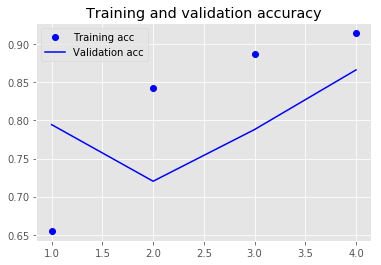

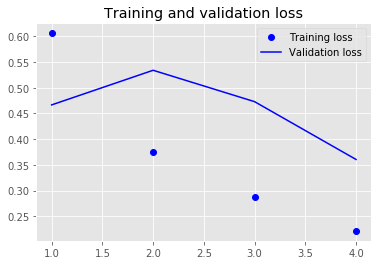

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Слои LSTM и GRU

Рассмотрим слой LSTM. Лежащий в его основе алгоритм долгой краткосрочной памяти (Long Short-Term Memory, LSTM)

Этот слой является вариантом слоя SimpleRNN, уже знакомого вам; он добавляет поддержку переноса информации через многие интервалы времени. Вообразите конвейерную ленту, движущуюся параллельно обрабатываемой последовательности. Информация из последовательности может в любой момент перекладываться на конвейерную ленту, переноситься к более поздним интервалам времени и сниматься с ленты, если она необходима. В этом заключается суть работы слоя LSTM: он сохраняет информацию для последующего использования, тем самым предотвращая постепенное затухание старых сигналов во время обработки.
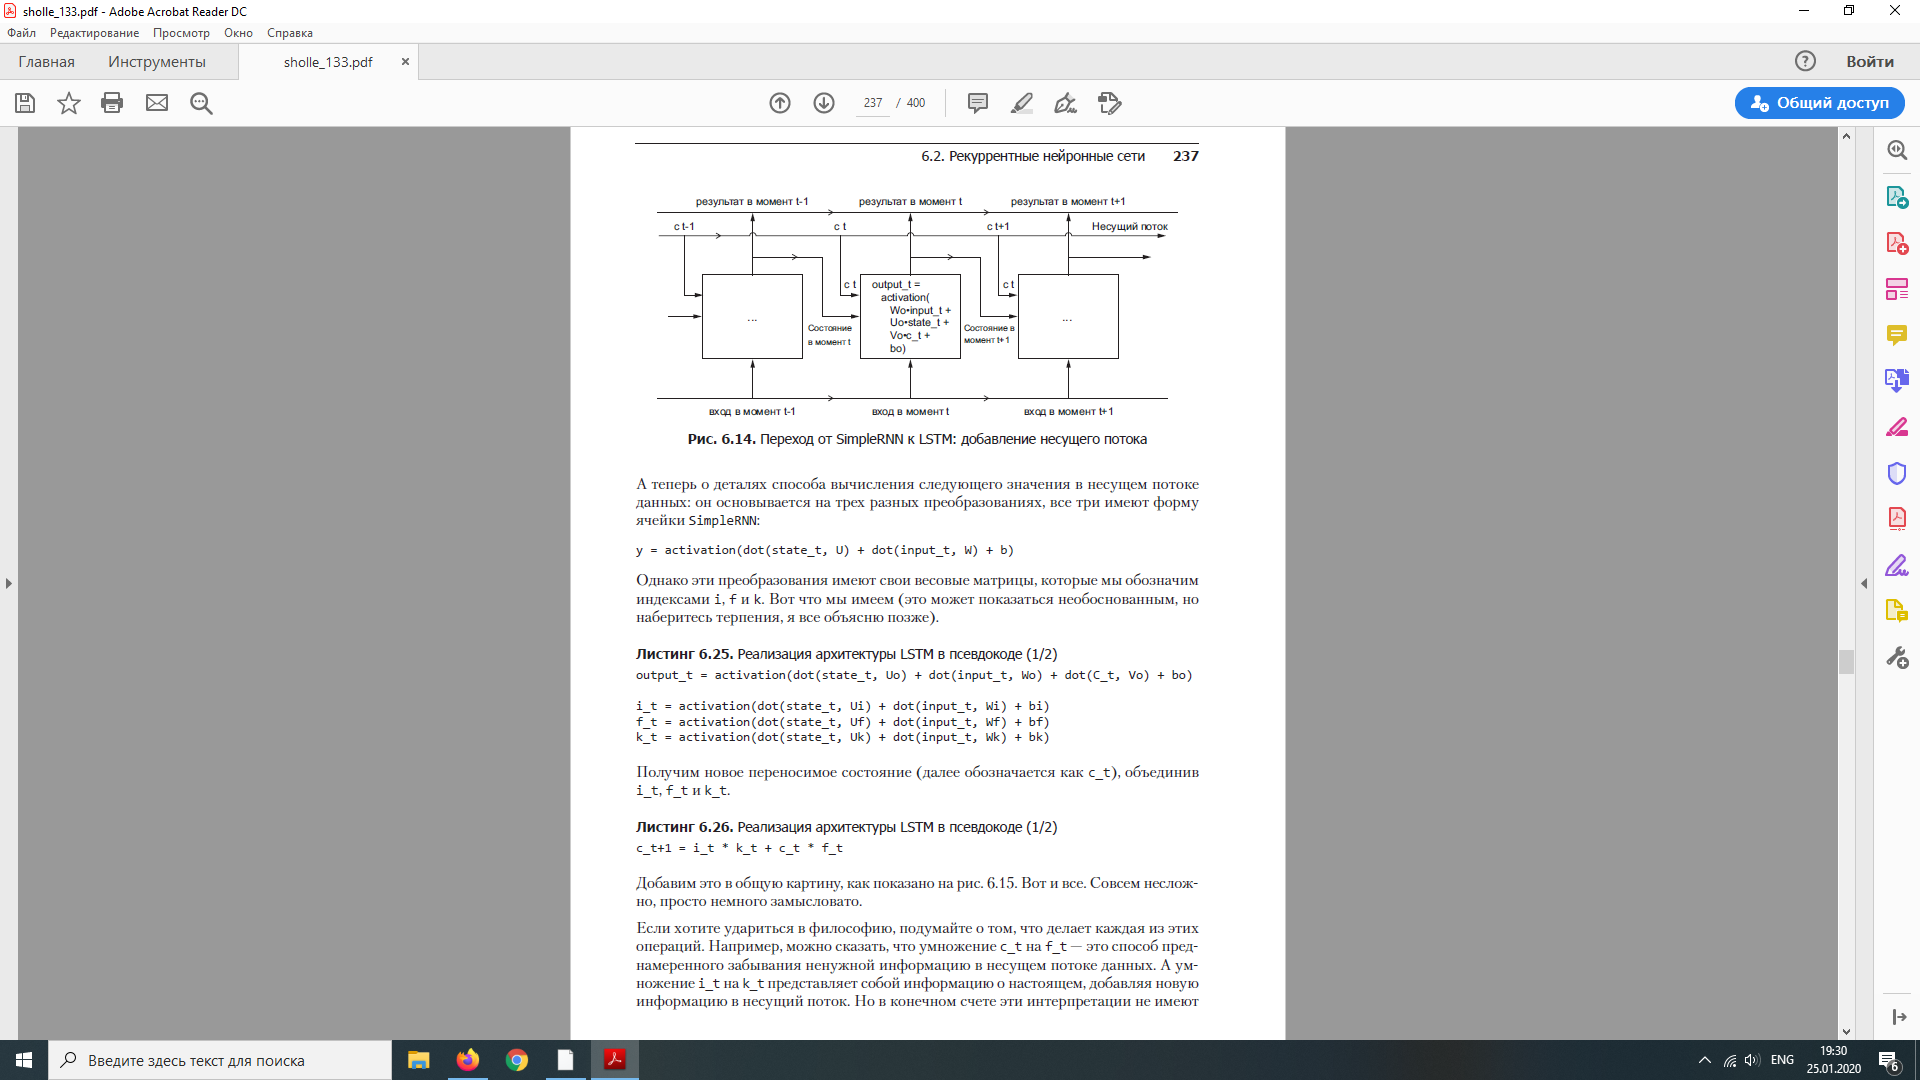
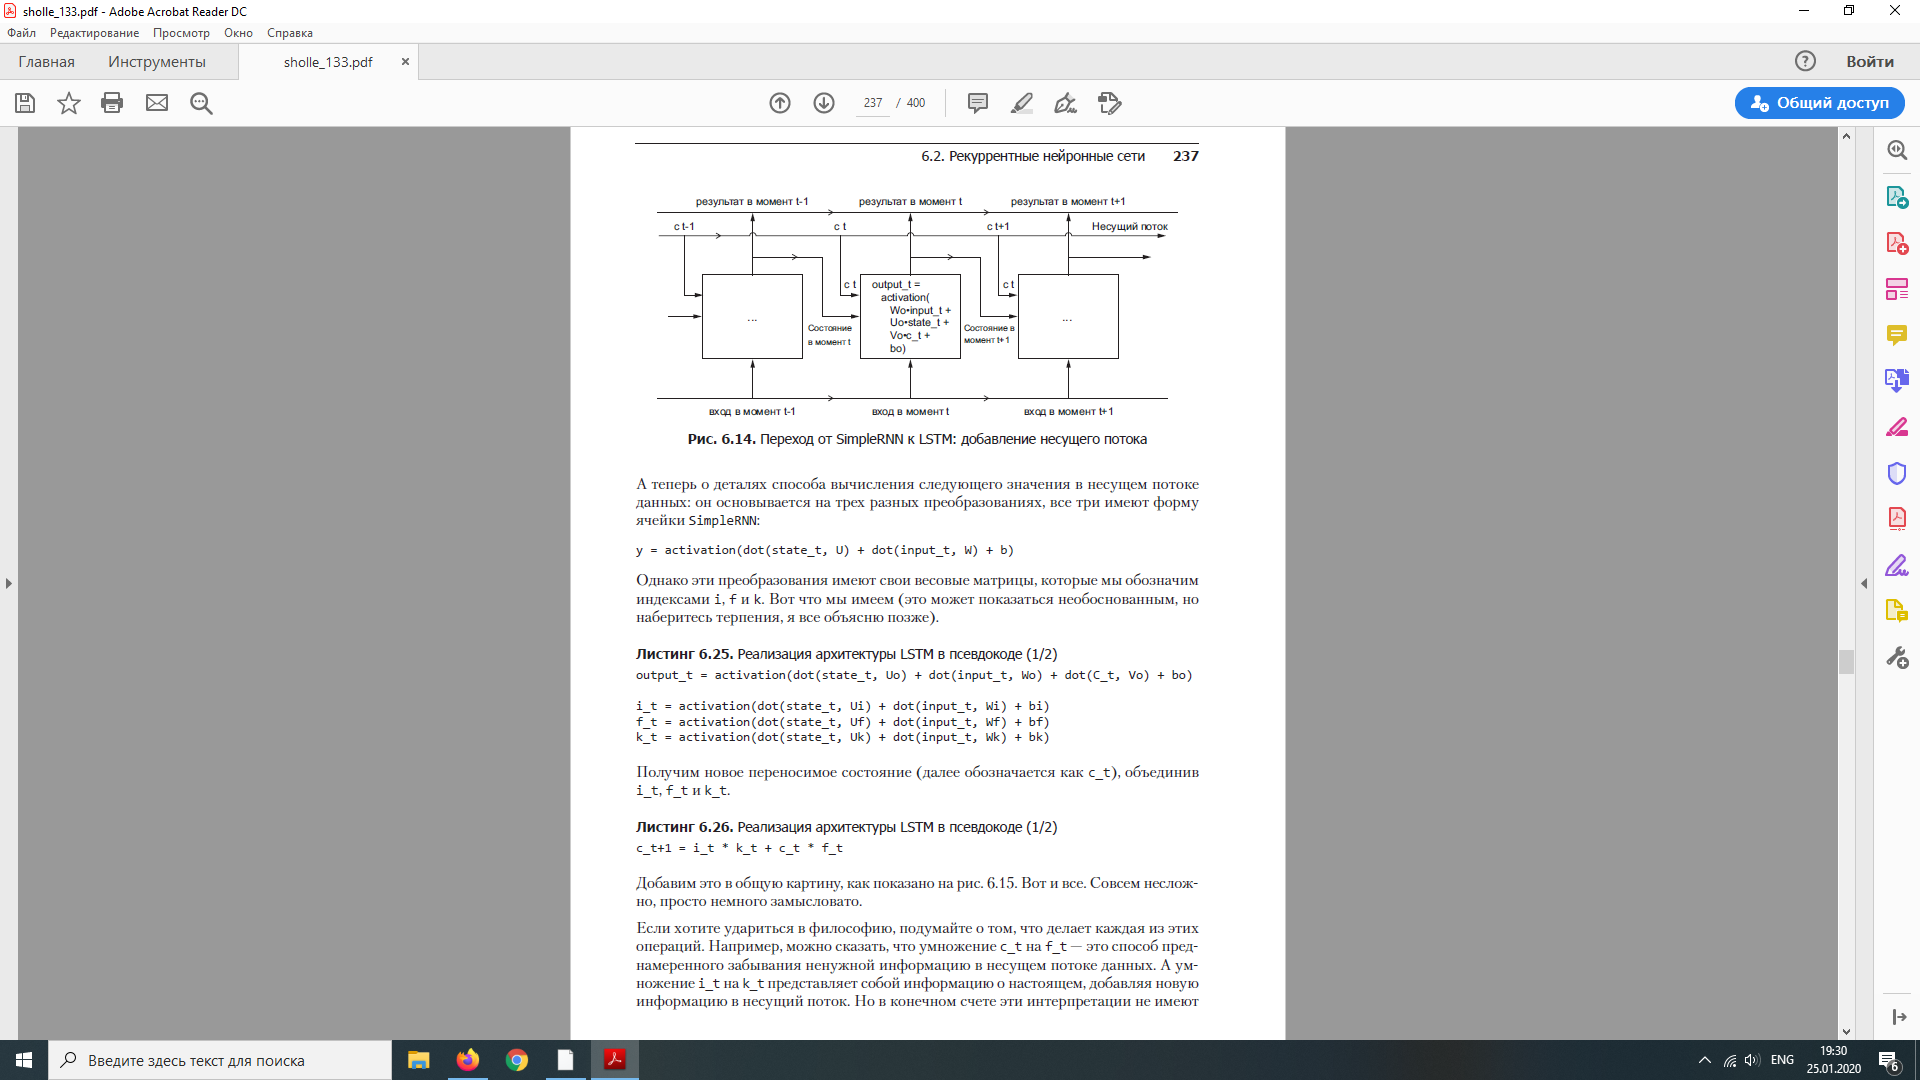

In [4]:
%%time
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(input_train, y_train,
    epochs=1,
    batch_size=128,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/1
20000/20000 [==============================] - 70s 3ms/step - loss: 0.5100 - acc: 0.7566 - val_loss: 0.3738 - val_acc: 0.8460
Wall time: 1min 10s


## Улучшенные методы использования рекуррентных нейронных сетей

### рекуррентное прореживание, наложение рекуррентных слоев, двунаправленные рекуррентные слои
рекуррентное прореживание — особый встроенный способ использования прореживания для борьбы с переобучением в рекуррентных слоях;


наложение рекуррентных слоев — способ увеличения репрезентативности сети (за счет увеличения объема вычислений);


двунаправленные рекуррентные слои — представляют одну и ту же информацию в рекуррентной сети разными способами, повышая точность и ослабляя проблемы, связанные с забыванием.

In [2]:
import os
data_dir = 'C:\\Users\\Kostya\\python scripts\\Data'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    


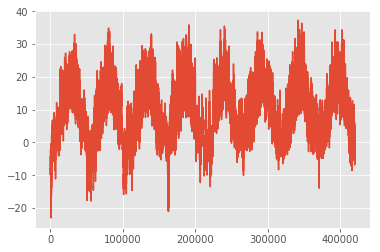

In [3]:
temp = float_data[:, 1] # температура (в градусах Цельсия)
plt.plot(range(len(temp)), temp)

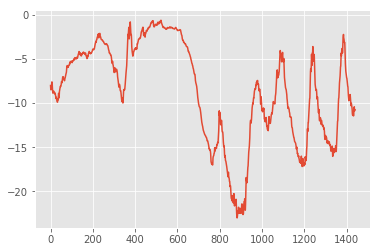

In [4]:
plt.plot(range(1440), temp[:1440])

In [5]:
lookback = 720# — количество наблюдений за предыдущие 5 дней;

step = 6# — шаг отбора образцов из наблюдений, то есть один образец за каждый час;

delay = 144# — целью являются следующие 24 часа в будущем.


Написать на Python генератор, который принимает текущий массив данных и возвращает пакеты данных, представляющие собой недавнее прошлое, а также целевую температуру в будущем. Поскольку образцы в наборе данных излишне избыточны (образцы N и N + 1 будут иметь много общего), было бы расточительством явно выделять и использовать каждый образец. Вместо этого мы будем генерировать образцы на лету, используя исходные данные

In [6]:
#Нормализация данных
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std


In [7]:
mean

array([ 988.88635885,    9.07734895,  283.14631345,    4.44854725,
         75.35405895,   13.3829553 ,    9.29695535,    4.08591725,
          5.8752111 ,    9.40521005, 1217.51429655,    2.1510037 ,
          3.56950915,  176.21703355])

In [9]:
#Функция-генератор, возвращающая временные последовательности образцов и их целей
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
            
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
    yield samples, targets
    
#data — исходный массив вещественных чисел, нормализованных кодом в листинге 6.32;
#
#lookback — количество интервалов в прошлом от заданного момента, за которое отбираются входные данные;
#
#delay — количество интервалов в будущем от заданного момента, за которое отбираются целевые данные;
#
#min_index и max_index — индексы в массиве data, ограничивающие область для извлечения данных; это помогает оставить в неприкосновенности сегменты проверочных и контрольных данных;
#
#shuffle — флаг, определяющий порядок извлечения образцов: с перемешиванием или в хронологическом порядке;
#
#batch_size — количество образцов в пакете;
#
#step — период в интервалах, из которого извлекается один образец; мы установим его равным 6, чтобы получить по одному образцу за каждый час.

In [10]:
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)
val_steps = (300000 - 200001 - lookback) // batch_size 
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [13]:
#базовое решение нейронки
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps)



In [ ]:
#Обучение и оценка модели на основе GRU
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
#можно добавить регуляризацию
model.add(layers.GRU(32,
    dropout=0.2,
    recurrent_dropout=0.2,
    input_shape=(None, float_data.shape[-1])))

model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=5,
    epochs=1,
    validation_data=val_gen,
    validation_steps=val_steps, use_multiprocessing=True)



Epoch 1/20


Exception in thread Thread-26:
Traceback (most recent call last):
  File "C:\Users\Kostya\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Kostya\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostya\Anaconda3\lib\site-packages\keras\utils\data_utils.py", line 690, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "C:\Users\Kostya\Anaconda3\lib\site-packages\keras\utils\data_utils.py", line 685, in <lambda>
    initargs=(seqs, self.random_seed))
  File "C:\Users\Kostya\Anaconda3\lib\multiprocessing\context.py", line 119, in Pool
    context=self.get_context())
  File "C:\Users\Kostya\Anaconda3\lib\multiprocessing\pool.py", line 176, in __init__
    self._repopulate_pool()
  File "C:\Users\Kostya\Anaconda3\lib\multiprocessing\pool.py", line 241, in _repopulate_pool
    w.start()
  File "C:\Users\Kostya\Anaconda3\lib\multiprocessing\process.py", line 112

### Наложение нескольких рекуррентных слоев друг на друга

Избавившись от эффекта переобучения, мы столкнулись с проблемой низкого качества, поэтому теперь нужно подумать об увеличении емкости сети. Вспомните описание обобщенного процесса машинного обучения: рекомендуется всегда стараться увеличивать емкость сети, пока на первое место не выйдет проблема переобучения (при условии, что предприняты все основные меры против нее, такие как прореживание). Пока проблема переобучения не стоит остро, вероятно, сеть имеет недостаточную емкость.

При наложении друг на друга рекуррентных слоев в Keras все промежуточные слои должны возвращать полные выходные последовательности (трехмерный тензор), а не только последний интервал. Это достигается установкой параметра return_sequences=True.

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
    dropout=0.1,
    recurrent_dropout=0.5,
    return_sequences=True,
    input_shape=(None, float_data.shape[-1])))

model.add(layers.GRU(64, activation='relu',
    dropout=0.1,
    recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=40,
    validation_data=val_gen,
    validation_steps=val_steps)

### Использование двунаправленных рекуррентных нейронных сетей

Двунаправленная рекуррентная сеть использует чувствительность RNN к порядку: она состоит из двух обычных рекуррентных сетей, таких как слои GRU и LSTM, с которыми вы уже знакомы, каждая из этих сетей обрабатывает входную последовательность в одном направлении (прямом или обратном), и затем полученные представления объединяются

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
#model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

### Обработка последовательных данных с помощью одномерной сверточной нейронной сети
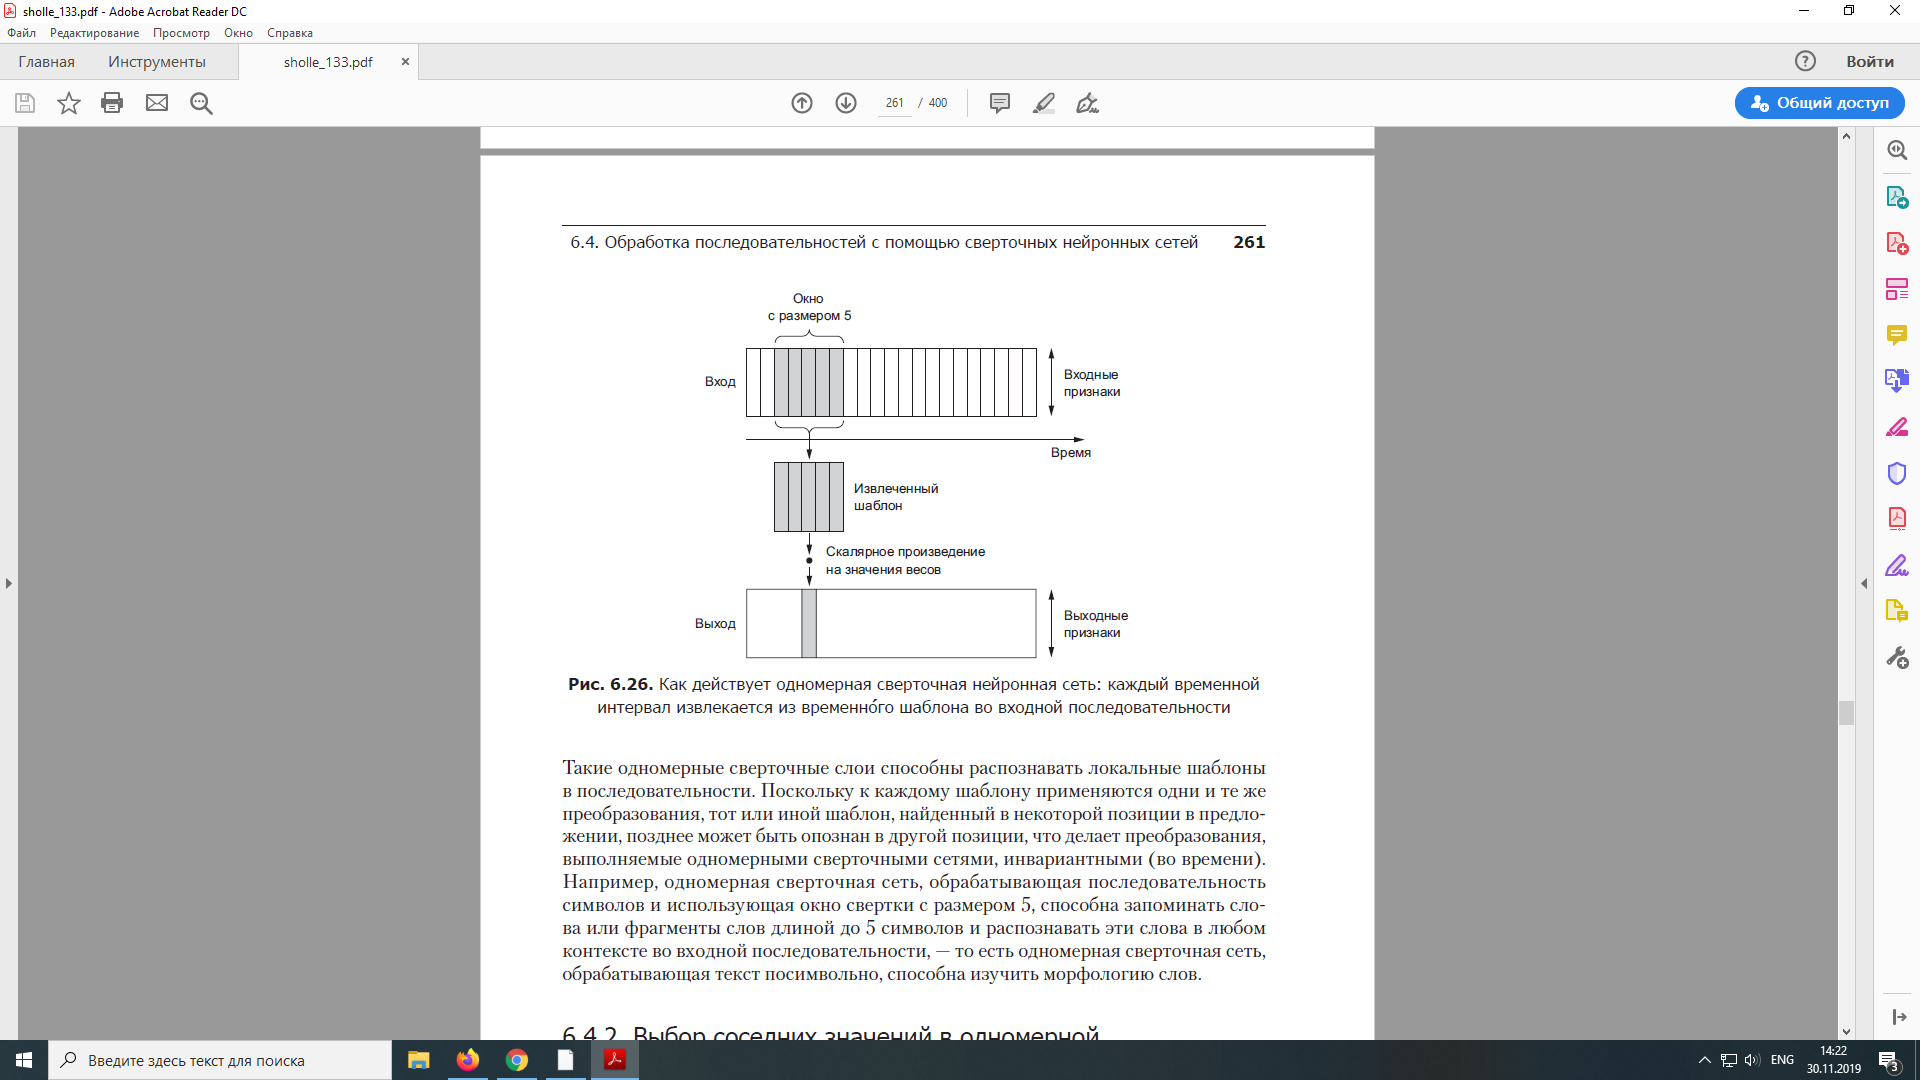

В Keras одномерные сверточные сети создаются с помощью слоя Conv1D, интерфейс которого напоминает интерфейс слоя Conv2D. Он принимает на входе трехмерные тензоры с формой (образцы, время, признаки) и возвращает трехмерные тензоры с той же формой. Окно свертки — это одномерное окно на оси времени: оси с индексом 1 во входном тензоре.

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=
max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)   

Точность на этапе проверки получилась несколько ниже, чем с применением LSTM, но скорость обработки в обоих случаях — на CPU и GPU — оказалась выше (конкретное увеличение скорости в значительной степени зависит от аппаратной конфигурации). Теперь можно повторно обучить модель на правильно выбранном количестве эпох (четыре) и проверить ее на контрольном наборе данных. Это убедительная демонстрация того, что одномерная сверточная нейронная сеть может служить быстрой и недорогой альтернативой рекуррентной сети в задаче определения эмоциональной окраски текста.

### Объединение сверточных и рекуррентных сетей для обработки длинных последовательностей

Поскольку одномерная сверточная сеть обрабатывает входные шаблоны независимо, она нечувствительна к порядку следования временных интервалов (кроме как в локальном масштабе, в пределах окна свертки), в отличие от рекуррентной сети. Конечно, для распознавания более протяженных шаблонов можно использовать прием наложения друг на друга нескольких сверточных слоев и слоев выбора соседних значений, в результате верхние слои будут видеть все более длинные фрагменты исходных входных данных, однако это слишком слабый способ включить чувствительность к порядку. Доказать слабость этого подхода можно на примере применения одномерных сверточных сетей для решения задачи прогнозирования температуры, где чувствительность к порядку является ключевым фактором для получения хорошего прогноза. В следующем примере повторно используются переменные, которые были определены прежде: float_data, train_gen, val_gen и val_steps. 

Получится плохо, код не сохранил

Одна из стратегий объединить скорость и легкость сверточных сетей с чувствительностью к порядку рекуррентных сетей заключается в использовании одномерной сверточной сети для предварительной обработки данных перед передачей их в рекуррентную сеть (рис. 6.30). Этот прием оказывается особенно выгодным, когда имеющиеся последовательности настолько длинны (с несколькими тысячами интервалов и больше), что их нереально обработать с помощью рекуррентной сети. Сверточная часть превратит длинную входную последовательность в более короткую последовательность высокоуровневых признаков (уменьшив ее разрешение). А затем последовательность выделенных признаков подается на вход рекуррентной части сети.

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
    input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps)

# За рамками модели Sequential: функциональный API фреймворка Keras + callbacks

### несколько выходов и входов

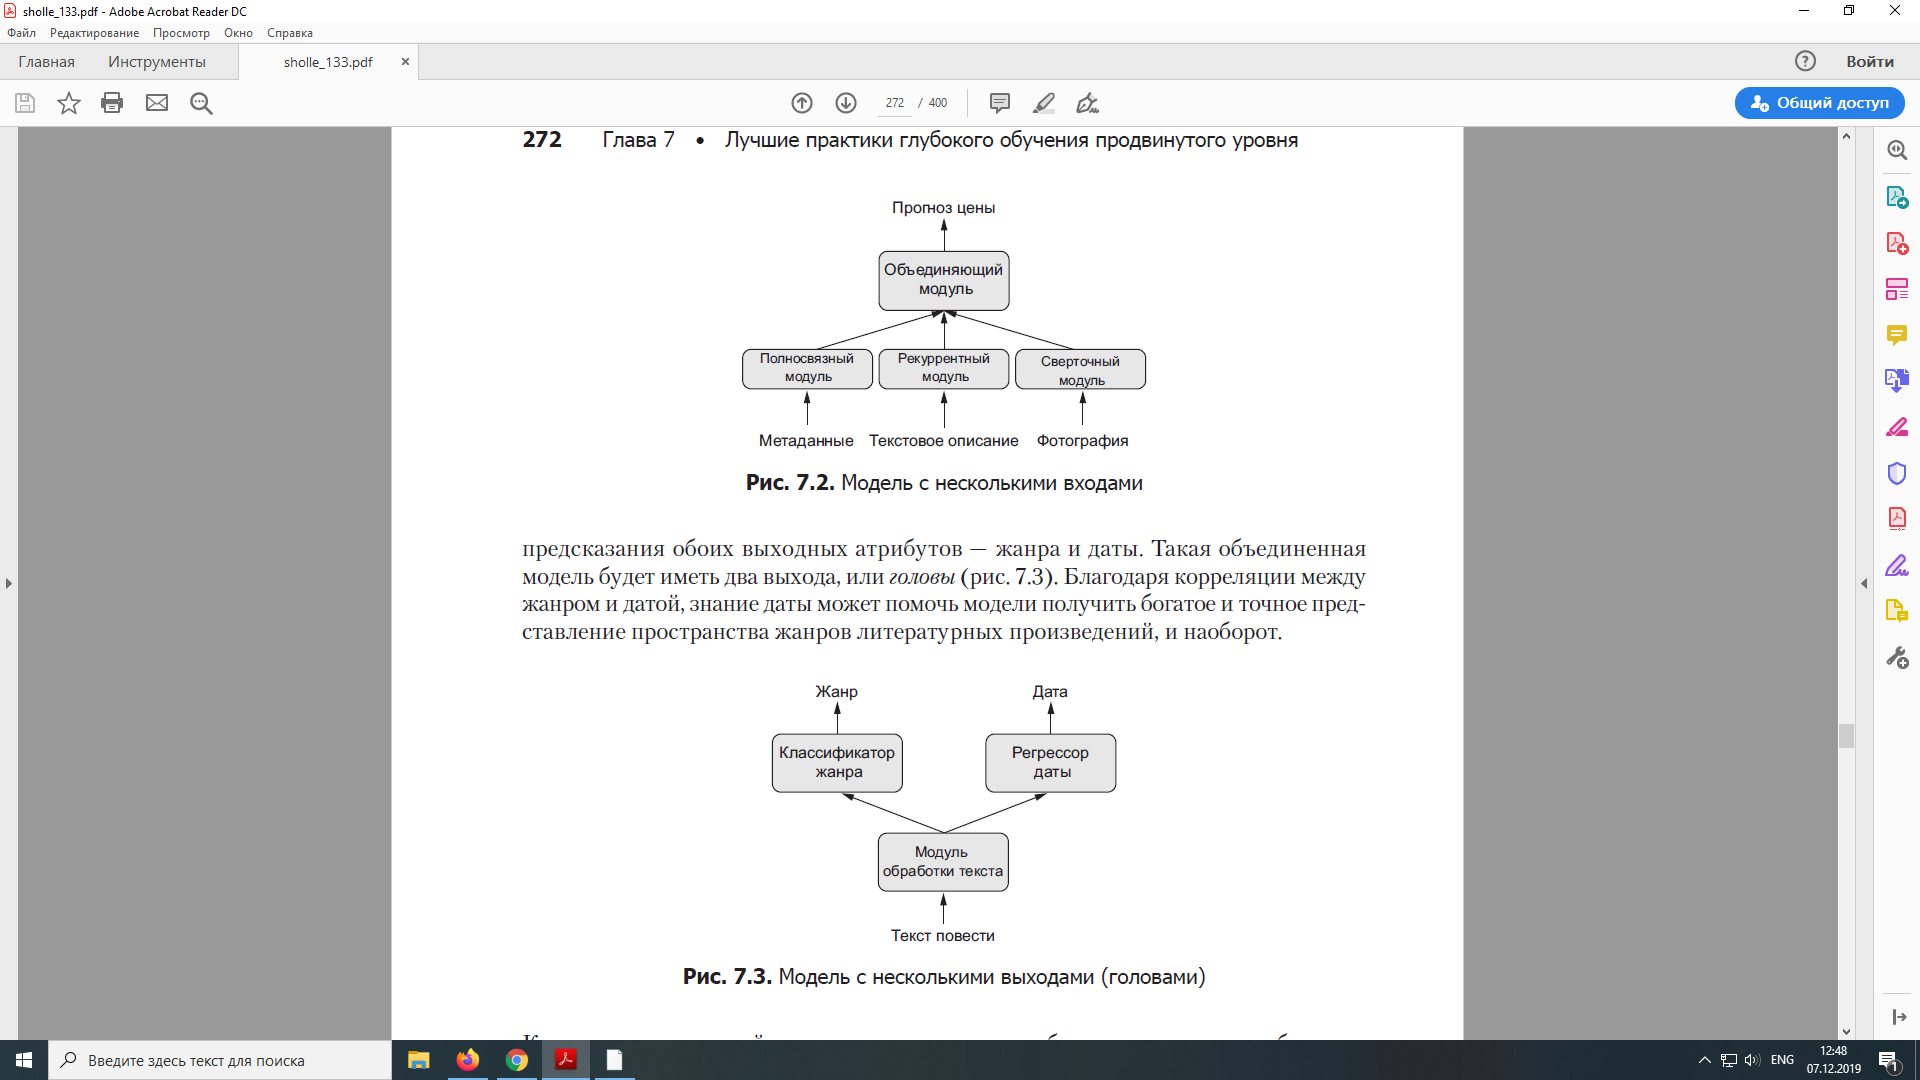


In [2]:
#Начнем с маленького примера, демонстрирующего простую модель Sequential и ее эквивалент с использованием функционального API:
from keras.models import Sequential, Model
from keras import layers
from keras import Input
seq_model = Sequential() #Уже знакомая нам модель Sequential
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

input_tensor = Input(shape=(64,)) 
x = layers.Dense(32, activation='relu')(input_tensor) 
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x) 
model = Model(input_tensor, output_tensor) 
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
model.fit(x_train, y_train, epochs=10, batch_size=128)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


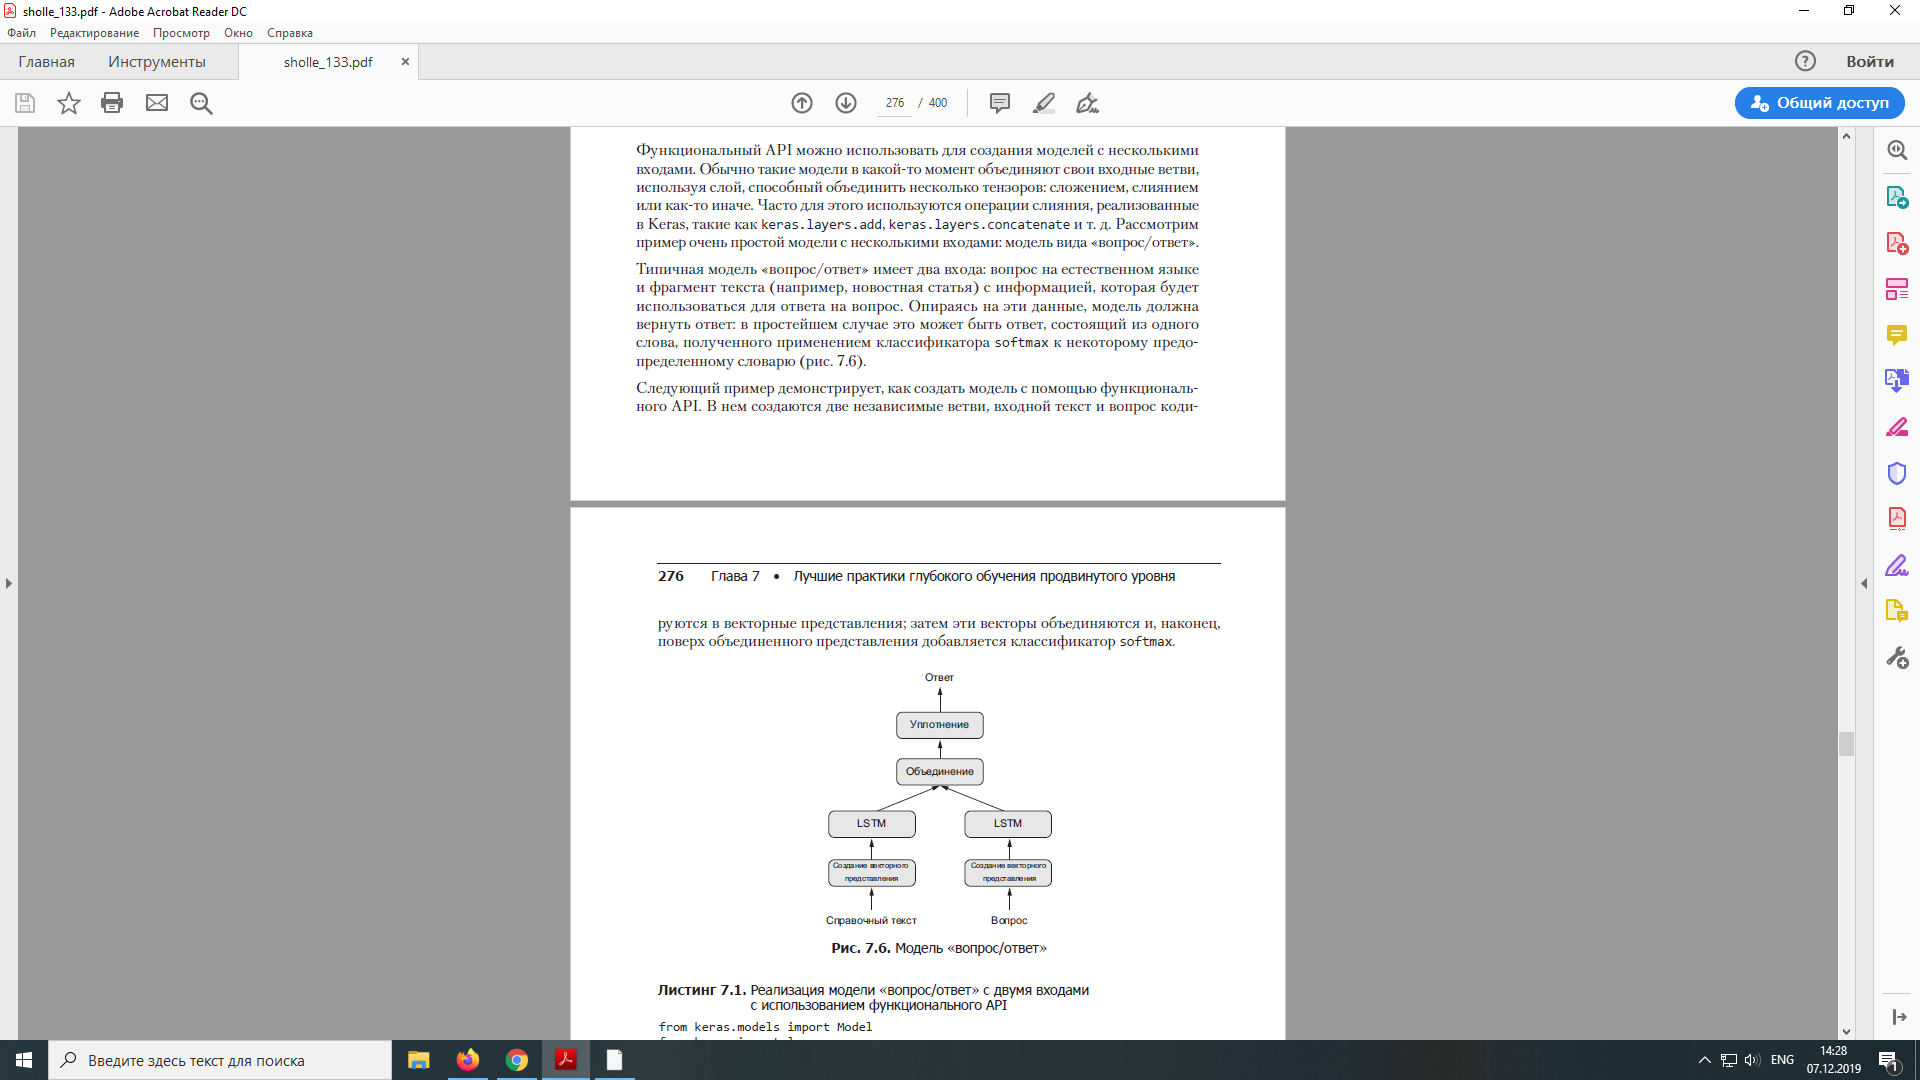

In [ ]:
from keras.models import Model
from keras import layers
from keras import Input
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text') #Входной текст — это последова-тельность целых чисел переменной длины. Обратите внимание на то, что при желании можно задать имя последовательности
embedded_text = layers.Embedding( text_vocabulary_size, 64)(text_input) # преобразование входн текста в послежовательность векторов 64
encoded_text = layers.LSTM(32)(embedded_text) #Преобразование векторов в единый вектор с помощью уровня LSTMТ

question_input = Input(shape=(None,), dtype='int32', name='question')#тоже для вопроса
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1) #объединение закодированных вопроса и текста
answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

import numpy as np
num_samples = 1000
max_length = 100
text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))

answers = np.zeros(shape=(num_samples, answer_vocabulary_size))
indices = np.random.randint(0, answer_vocabulary_size, size=num_samples)

for i, x in enumerate(answers):
    x[indices[i]] = 1
    
model.fit([text, question], answers, epochs=10, batch_size=128)
model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 6.2148 - acc: 0.0020
Epoch 2/10
 128/1000 [==>...........................] - ETA: 0s - loss: 6.2004 - acc: 0.0859

Функциональный API также можно использовать для создания моделей с несколькими выходами (или головами). Простейшим примером может служить сеть, пытающаяся одновременно предсказать разные свойства данных, например принимающая на входе последовательность постов из социальной сети от некоторой анонимной персоны и пытающаяся предсказать характеристики этой персоны, такие как возраст, пол и уровень доходов

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model
vocabulary_size = 50000
num_income_groups = 10
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups,
    activation='softmax',
    name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input,
    [age_prediction, income_prediction, gender_prediction])

model.compile(optimizer='rmsprop',
    loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
             loss_weights=[0.25, 1., 10.])

model.compile(optimizer='rmsprop',
loss={'age': 'mse',
    'income': 'categorical_crossentropy',
    'gender': 'binary_crossentropy'},
             loss_weights={'age': 0.25,
                            'income': 1.,
                            'gender': 10.})

model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64) 

model.fit(posts, {'age': age_targets, 'income': income_targets, 'gender': gender_targets},
          epochs=10, batch_size=64)

Важно отметить, что для обучения такой модели необходима возможность задавать разные функции потерь для разных выходов: например, определение возраста — это задача скалярной регрессии, но определение пола — задача бинарной классификации, требующая отдельной процедуры обучения. Однако из-за того, что градиентный спуск требует минимизации скаляра, эти функции потерь должны объединяться в единственное значение. Простейший способ объединения потерь — их суммирование. В Keras для этого можно передать функции compile список или словарь с разными объектами для разных выходов; в результате значения потерь будут суммироваться в общее значение потери, которое будет минимизироваться в ходе обучения.

Обратите внимание: несбалансированные вклады потерь приведут к созданию представления, оптимизированного преимущественно для задачи с наибольшей потерей, в ущерб другим задачам. Чтобы исправить эту проблему, можно присвоить разные степени важности значениям потерь, вносящим вклад в общую потерю. Это может пригодиться, когда значения потерь имеют разные масштабы. Например, средняя квадратичная ошибка (Mean Squared Error, MSE), используемая как функция потерь в задаче определения возраста, обычно принимает значение около 3–5, тогда как перекрестная энтропия, используемая в задаче определения пола, может колебаться около величины 0,1. Чтобы в такой ситуации сбалансировать вклад разных потерь, можно присвоить вес 10 перекрестной энтропии и вес 0,25 — оценке MSE.

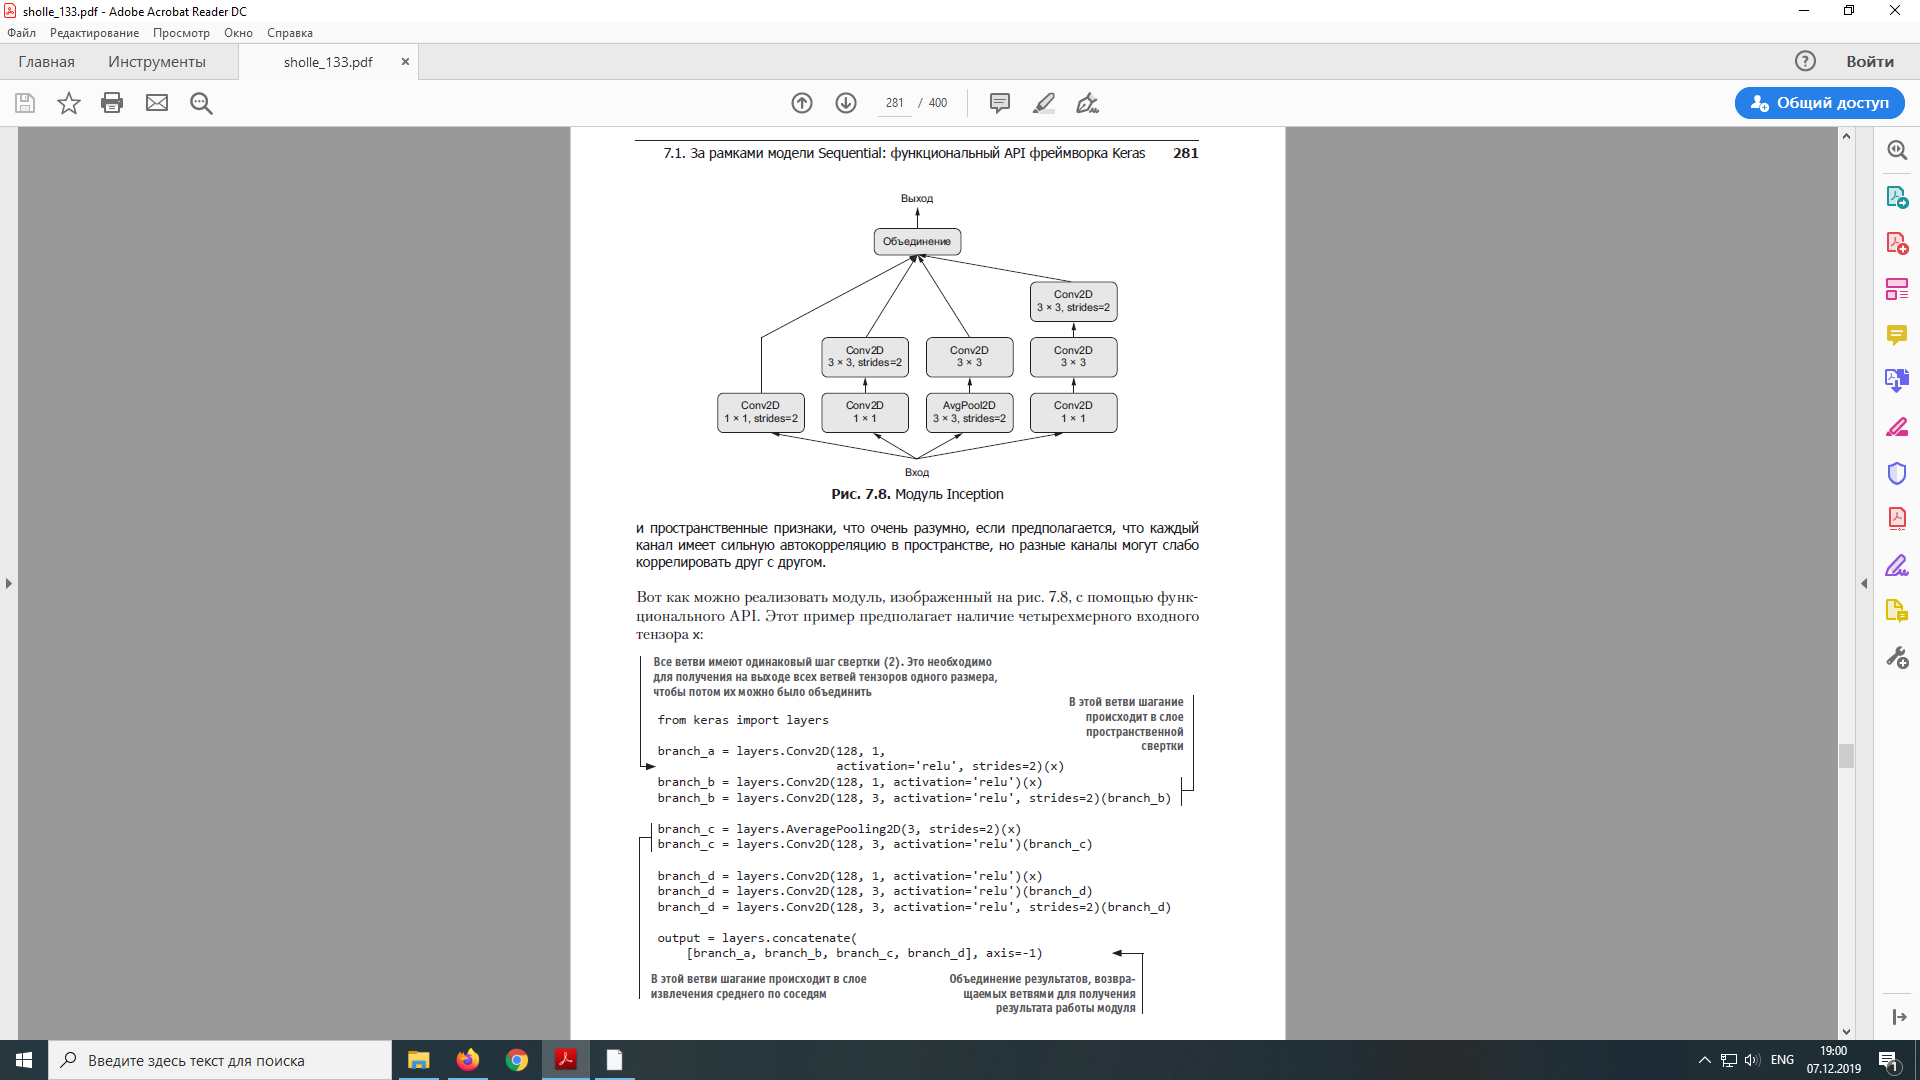

7.1.5. Повторное использование экземпляров слоев
Еще одной важной особенностью функционального API является возможность повторного использования экземпляра слоя. Когда вы дважды вызываете экземпляр слоя, вместо создания нового слоя в каждом вызове повторно будут использоваться те же самые веса. Это позволяет создавать модели с общими ветвями, когда имеется несколько ветвей, совместно использующих общие знания и выполняющих одинаковые операции. Другими словами, они вместе используют общие представления и совместно обучают их на разных входных наборах.

В такой конфигурации два входных предложения взаимозаменяемы, потому что семантическое сходство является симметричным отношением: сходство А с Б идентично сходству Б с А. По этой причине нецелесообразно обучать две независимые модели для обработки каждого входного предложения. Предпочтительнее было бы обрабатывать оба одним слоем LSTM. Представления этого слоя LSTM (его веса) определяются на основе обоих входов одновременно. Мы называем это сиамской моделью LSTM, или общим LSTM.



In [ ]:
from keras import layers
from keras import Input
from keras.models import Model
lstm = layers.LSTM(32) 
left_input = Input(shape=(None, 128))
left_output = lstm(left_input) 
right_input = Input(shape=(None, 128))
right_output = lstm(right_input) 
merged = layers.concatenate([left_output, right_output], axis=-1) #Конструирование левой ветви модели: на вход подаются последовательности переменной длины векторов с размерностью 128
predictions = layers.Dense(1, activation='sigmoid')(merged)#Создание единственного экземпляра слоя LSTM, выполняется однократно
model = Model([left_input, right_input], predictions) 
model.fit([left_data, right_data], targets)

### 7.2.1. Применение обратных вызовов для воздействия на модель в ходе обучения

Обратные вызовы ModelCheckpoint и EarlyStopping

Обратный вызов EarlyStopping можно использовать для прерывания процесса обучения, если находящаяся под наблюдением целевая метрика не улучшалась на протяжении заданного количества эпох. Например, этот обратный вызов позволит прервать обучение после наступления эффекта переобучения и тем самым избежать повторного обучения модели в течение меньшего количества эпох. Этот обратный вызов обычно используется в комбинации с ModelCheckpoint, который позволяет сохранять состояние модели в ходе обучения (и, при необходимости, сохранять только лучшую модель: версию модели, достигшую лучшего качества к концу эпохи):

In [2]:
import keras
callbacks_list = [ keras.callbacks.EarlyStopping( monitor='val_acc', patience=1, ), #прерывание, когда качество не улучшилось
                  #рерывание обучения, когда точность не улучшается дольше чем в течение одной эпохи (другими словами, в течение двух эпох)
                  
                  #Сохранение текущих весов после каждой эпохи 
                  keras.callbacks.ModelCheckpoint( filepath='my_model.h5', #Путь к файлу модели 
                                                  monitor='val_loss', save_best_only=True, )]#Эти аргументы требуют, чтобы файл модели не затирался, если значение val_loss не улучшилось, что позволяет сохранять только лучшую модель

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#Мы следим за точностью, поэтому она должна быть частью набора метрик модели
model.fit(x, y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))
#Обратите внимание: поскольку обратный вызов следит за потерями и точностью на проверочных данных, мы должны передать validation_data в вызов fit

NameError: name 'model' is not defined

Обратный вызов ReduceLROnPlateau

Этот обратный вызов можно использовать для снижения скорости обучения, когда потери на проверочных данных перестают уменьшаться. Уменьшение или увеличение скорости обучения в точке перегиба кривой потерь — эффективная стратегия выхода из локального минимума в ходе обучения. Следующий

In [ ]:
callbacks_list = [ keras.callbacks.ReduceLROnPlateau( monitor='val_loss' #Мониторинг потерь модели на проверочных данных 
                                                     factor=0.1, #Уменьшение скорости обучения в 10 раз 
                                                     patience=10, )]#Произведение вызова, когда потери на проверочных данных не улучшаются в течение 10 эпох

model.fit(x, y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))

Разработка своего обратного вызова

Если в ходе обучения потребуется выполнить какие-то особые действия, не предусмотренные ни одним из встроенных обратных вызовов, можно написать свой обратный вызов. Обратные вызовы реализуются путем наследования класса keras.callbacks.Callback. Вы можете реализовать любые из следующих методов с говорящими именами, которые будут вызываться в соответствующие моменты в ходе обучения:

on_epoch_begin Вызывается в начале каждой эпохи

on_epoch_end Вызывается в конце каждой эпохи

on_batch_begin Вызывается перед началом обработки каждого пакета

on_batch_end Вызывается сразу после окончания обработки каждого пакета

on_train_begin Вызывается в начале обучения

on_train_end Вызывается в конце обучения


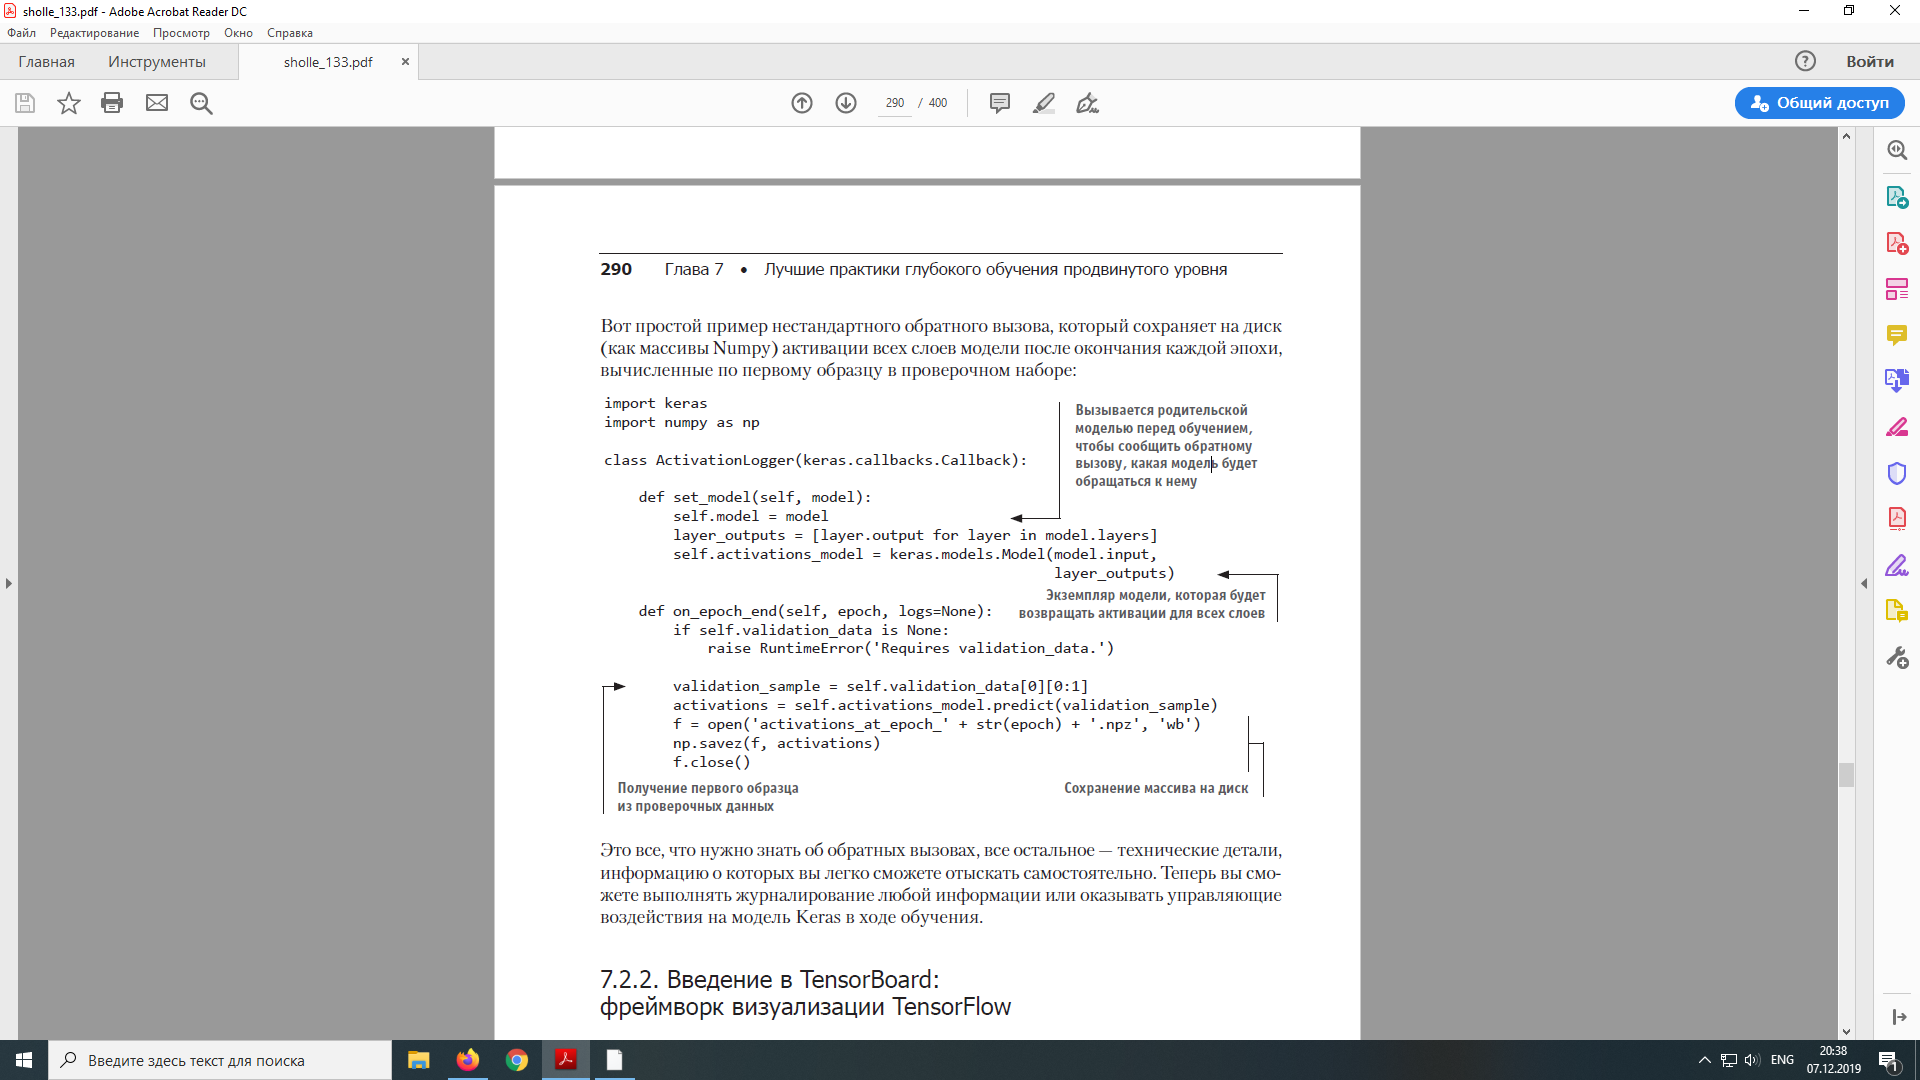

Многие аспекты обучения модели нельзя предсказать заранее. Например, нельзя предсказать заранее количество эпох, обеспечивающее оптимальное значение потерь на проверочном наборе. В примерах, приводившихся до сих пор, использовалась стратегия обучения с достаточно большим количеством эпох. Таким образом достигался эффект переобучения, когда сначала выполняется первый прогон, чтобы выяснить необходимое количество эпох обучения, а затем второй — новый, с самого начала — с выбранным оптимальным количеством эпох. Конечно, это довольно расточительная стратегия.
Гораздо лучше было бы остановить обучение, как только выяснится, что оценка потерь на проверочном наборе перестала улучшаться. Это можно реализовать с использованием механизма обратных вызовов в Keras. Обратный вызов — это объект (экземпляр класса, реализующего конкретные методы), который передается в модель через вызов fit и который будет вызываться моделью в разные моменты в процессе обучения. Он имеет доступ ко всей информации о состоянии модели и ее качестве и может предпринимать следующие действия: прерывать обучение, сохранять модели, загружать разные наборы весов или как-то иначе изменять состояние модели.

Вот несколько примеров использования обратных вызовов:

фиксация состояния модели в контрольных точках — сохранение текущих весов модели в разные моменты в ходе обучения;

ранняя остановка — прерывание обучения, когда оценка потерь на проверочных данных перестает улучшаться (и, конечно, сохранение лучшего варианта модели, полученного в ходе обучения);

динамическая корректировка значений некоторых параметров в процессе обучения, например шага обучения оптимизатора;

журналирование оценок для обучающего и проверочного наборов данных в ходе обучения или визуализация представлений, получаемых моделью, по мере их обновления — индикатор выполнения в Keras, с которым вы уже знакомы, — обратный вызов!

keras.callbacks.ModelCheckpoint

keras.callbacks.EarlyStopping

keras.callbacks.LearningRateScheduler

keras.callbacks.ReduceLROnPlateau

keras.callbacks.CSVLogger
callbacks_list = [keras.callbacks.EarlyStopping( monitor='val_acc', patience=1, ),
keras.callbacks.ModelCheckpoint( filepath='my_model.h5',
monitor='val_loss', save_best_only=True, )

Прерывание обучения, когда точность не улучшается дольше чем в течение одной эпохи (другими словами, в течение двух эпох)

Сохранение текущих весов после каждой эпохи

Эти аргументы требуют, чтобы файл модели не затирался, если значение val_loss не улучшилось, что позволяет сохранять только лучшую модель


]

model.fit(x, y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))



Обратный вызов ReduceLROnPlateau
Этот обратный вызов можно использовать для снижения скорости обучения, когда потери на проверочных данных перестают уменьшаться. Уменьшение или увеличение скорости обучения в точке перегиба кривой потерь — эффективная стратегия выхода из локального минимума в ходе обучения. Следующий пример демонстрирует применение обратного вызова ReduceLROnPlateau:
callbacks_list = [ keras.callbacks.ReduceLROnPlateau( monitor='val_loss' Мониторинг потерь модели на проверочных данных factor=0.1, Уменьшение скорости обучения в 10 раз patience=10, )]

### Извлечение максимальной пользы из моделей

7.3.1. Шаблоны улучшенных архитектур
В предыдущем разделе мы рассмотрели один из важнейших шаблонов проектирования: остаточные связи. Однако есть еще два шаблона, которые вы должны знать: нормализация и раздельные свертки по глубине (depthwise separable convolution). Эти шаблоны особенно хорошо подходят для создания высококачественных глубоких сверточных нейронных сетей, но их нередко можно встретить во многих других типах архитектур.

Пакетная нормализация

Нормализация — это широкая категория методов, стремящихся сделать сходство разных образцов более заметным для модели машинного обучения, что помогает модели выделять и обобщать новые данные. В этой книге вы уже несколько раз видели наиболее распространенную форму нормализации: центрирование данных по нулю вычитанием среднего значения и придание единичного стандартного отклонения делением на их стандартное отклонение. Фактически такая нормализация предполагает, что данные соответствуют нормальному закону распределения (или закону Гаусса), центрируя и приводя это распределение к единичной дисперсии:
normalized_data = (data - np.mean(data, axis=...)) / np.std(data, axis=...)

Пакетная нормализация — это тип слоя (BatchNormalization в Keras), введенный в 2015 году Сергеем Йоффе (Sergey Ioffe) и Кристианом Сегеди (Christian Szegedy)1; он может адаптивно нормализовать данные, даже если среднее и дисперсия изменяются во время обучения. Его принцип действия основан на вычислении экспоненциального скользящего среднего и дисперсии данных, наблюдаемых в процессе обучения. Основное назначение пакетной нормализации — помочь распространению градиента подобно остаточным связям и дать возможность создавать более глубокие сети. Некоторые глубокие сети могут обучаться, только если они включают в себя несколько слоев BatchNormalization. Например, слои BatchNormalization широко используются во многих продвинутых архитектурах сверточных нейронных сетей, входящих в состав Keras, таких как ResNet50, Inception V3 и Xception.
Обычно слой BatchNormalization используется после сверточного или полносвязного слоя:
conv_model.add(layers.Conv2D(32, 3, activation='relu'))
conv_model.add(layers.BatchNormalization()) После слоя Conv
dense_model.add(layers.Dense(32, activation='relu'))
dense_model.add(layers.BatchNormalization()) После слоя Dense

Раздельные свертки по глубине

Что бы вы подумали, если бы я сказал, что существует такой слой, который можно использовать взамен Conv2D и с помощью которого сделать модель более легкой (с меньшим количеством обучаемых весовых параметров) и быстрой (с меньшим количеством операций с вещественными числами), а также повысить качество решения задачи на несколько процентных пунктов? Всеми перечисленными качествами обладает слой раздельной свертки по глубине (SeparableConv2D). Этот слой выполняет пространственную свертку каждого канала во входных данных в отдельности перед смешиванием выходных каналов посредством поточечной свертки (свертки 1 × 1), как показано на рис. 7.16. Это эквивалентно раздельному выделению пространственных и канальных признаков, что оправданно, если предполагается сильная корреляция пространственных местоположений на входе, но разные каналы практически не зависят друг от друга. Он требует намного меньше параметров и выполняет меньше вычислений, благодаря чему получаются более быстрые модели с меньшими размерами. И поскольку это более репрезентативно эффективный способ выполнения свертки, он позволяет получать более качественные представления с меньшим объемом исходных данных и, соответственно, более качественные модели.


In [3]:
from keras.models import Sequential, Model
from keras import layers
height = 64
width = 64
channels = 3
num_classes = 10
model = Sequential()
model.add(layers.SeparableConv2D(32, 3,
activation='relu',
input_shape=(height, width, channels,)))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

Подбор гипер параметров

Ансамблирование моделей

# Генеративное глубокое обучение

## Генерирование текста с помощью LSTM

В примере, представленном далее в этом разделе, мы возьмем слой LSTM, передадим ему строки длиной N символов, извлеченные из текстового корпуса, и обучим его предсказывать символ N + 1. На выходе модель будет возвращать вектор softmax с вероятностями для всех возможных символов: распределение вероятностей для следующего символа. Такой слой LSTM называется языковой нейронной моделью уровня символов.

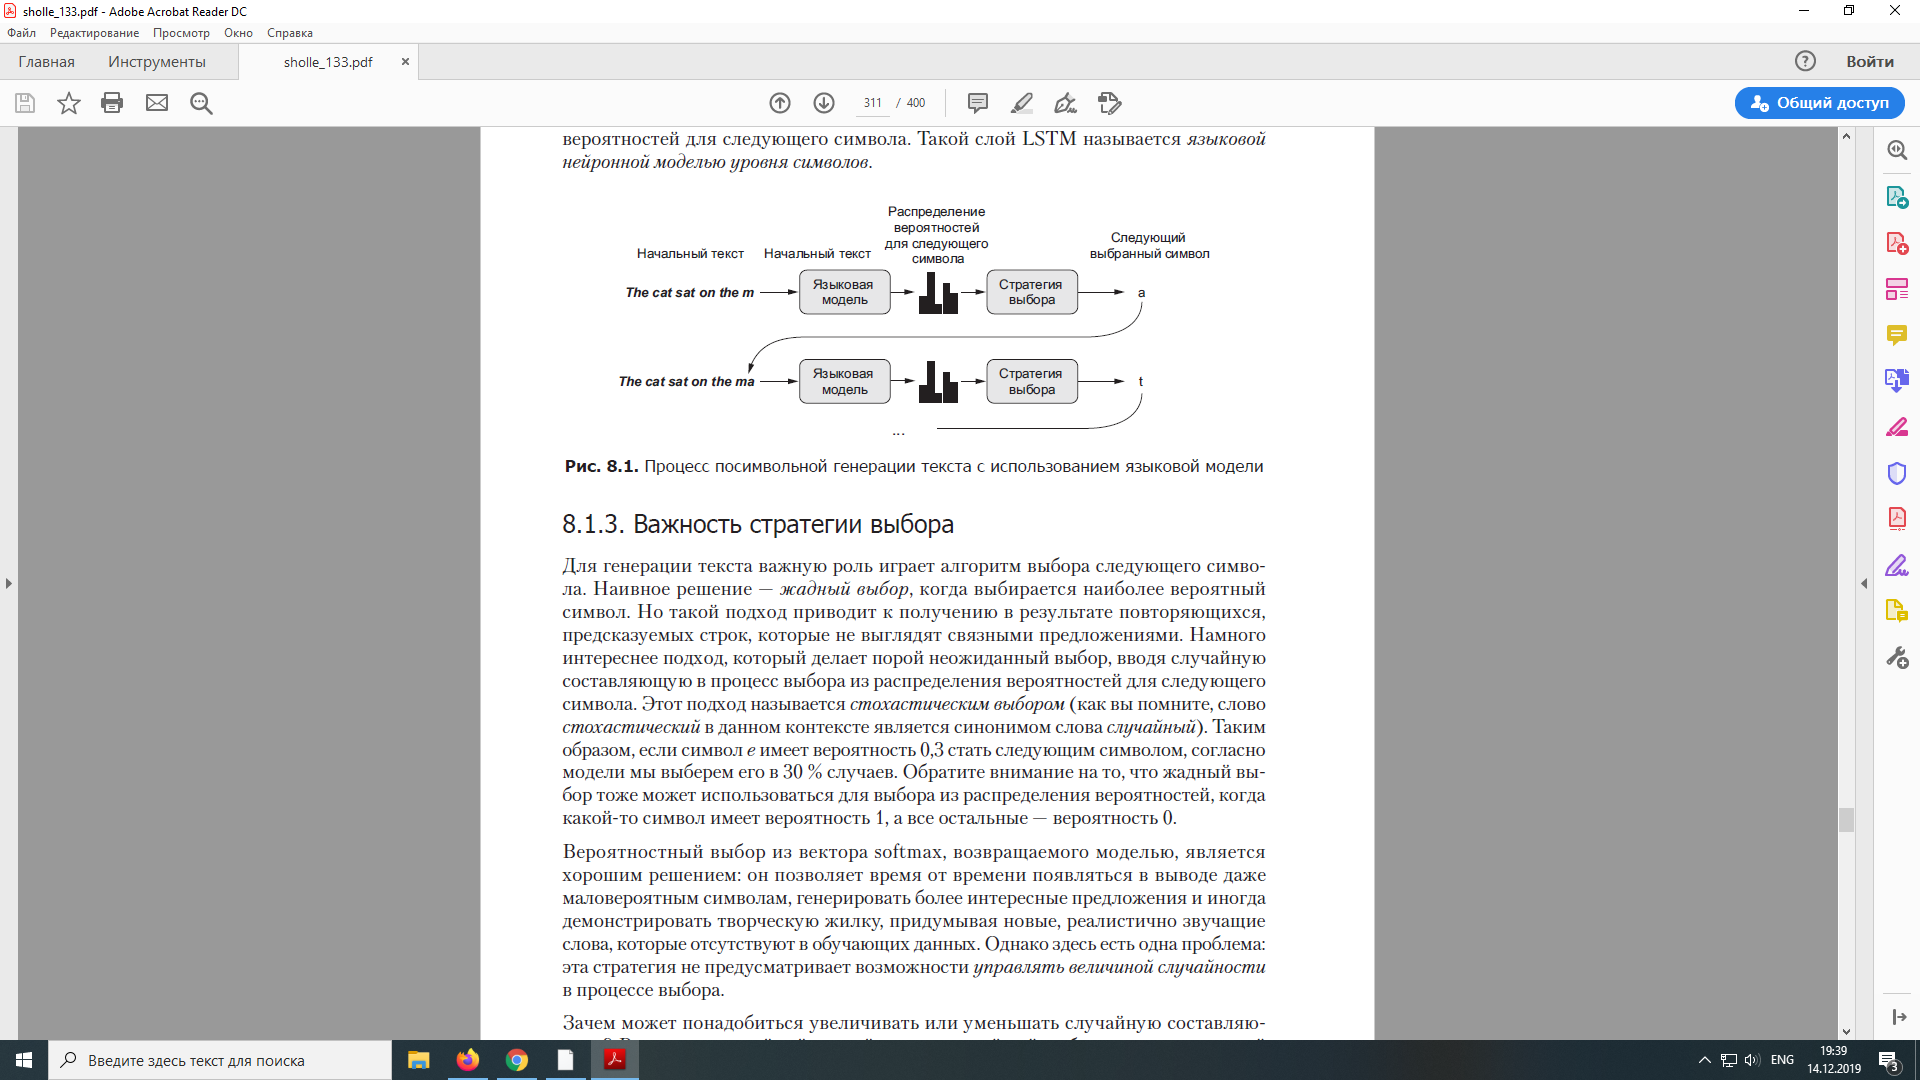

символ выбирается из равномерно распределенных вероятностей и каждый символ одинаково вероятен. Эта схема имеет максимальную случайность; иными словами, это распределение вероятностей имеет максимальную энтропию. Естественно, она не произведет ничего интересного. С другой стороны, жадный выбор тоже не производит ничего интересного и не имеет случайной составляющей: соответствующее распределение вероятностей имеет минимальную энтропию. Выбор из «реального» распределения вероятностей — распределения, возвращаемого функцией softmax, — находится между этими двумя крайностями.

Для управления величиной случайности в процессе выбора введем параметр, который назовем температурой softmax, характеризующий энтропию распределения вероятностей, используемую для выбора:

In [2]:
import numpy as np
def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature 
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)

In [4]:
import keras
import numpy as np
path = keras.utils.get_file('nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
    
text = open(path).read().lower()
    
print('Corpus length:', len(text))

Corpus length: 600901


Затем извлечем частично перекрывающиеся последовательности с длиной maxlen, выполним прямое кодирование и упакуем в трехмерный массив Numpy x с формой (последовательности, максимальная длина, уникальные символы). Одновременно подготовим массив y с соответствующими целями: векторы с символами, полученные прямым кодированием, которые следуют за каждой извлеченной последовательностью.

In [7]:
maxlen = 60 #Извлечение последовательностей по 60 символов
step = 3 #Новые последовательности выбираются через каждые 3 символа
sentences = [] #Хранение извлеченных последовательностей
next_chars = [] #Хранение целей (символов, следующих за последовательностями)
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))


Number of sequences: 200281


In [10]:
chars = sorted(list(set(text))) #Список уникальных символов в корпусе
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars) 
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1

Unique characters: 59
Vectorization...


Эта сеть состоит 
из единственного слоя LSTM, за которым следует классификатор Dense с функцией softmax выбора из всех возможных символов. Но имейте в виду, что рекуррентные нейронные сети не единственный способ генерирования последовательностей данных; одномерные сверточные сети тоже показали превосходные результаты в решении этой задачи.

In [42]:
from keras import layers
model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)



Обучение модели и извлечение образцов из нее
Имея обученную модель и фрагмент начального текста, можно сгенерировать новый текст, выполнив следующие пункты:

1.
Извлечь из модели распределение вероятностей следующего символа для имеющегося на данный момент сгенерированного текста.

2.
Выполнить взвешивание распределения с заданной температурой.

3.
Выбрать следующий символ в соответствии с вновь взвешенным распределением вероятностей.

4.
Добавить новый символ в конец текста.
Вот код, который мы используем для взвешивания оригинального распределения вероятностей, возвращаемого моделью, и извлечения индекса символа (функция выборки).

In [43]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [22]:
#Листинг 8.7. Цикл генерации текста
import random
import sys
for epoch in range(1, 10):
    print('epoch', epoch)
    model.fit(x, y, batch_size=128, epochs=1) # 1 итерация
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    #if epoch > 20:
    print('--- Generating with seed: "' + generated_text + '"')
    
    for temperature in [0.5]:#, 0.5, 1.0, 1.2]: # генерация текста для разных температур
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)
        
        for i in range(5):# Генерация 400 символов, начиная с начального текста 
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
                preds = model.predict(sampled, verbose=0)[0]
                next_index = sample(preds, temperature)
                next_char = chars[next_index]
                generated_text += next_char
                generated_text = generated_text[1:]
                sys.stdout.write(next_char)

epoch 1
Epoch 1/1
200281/200281 [==============================] - 87s 434us/step - loss: 1.2865
--- Generating with seed: " it would sound nicer, if, instead of our cruelty, perhaps
o"
------ temperature: 0.5
 it would sound nicer, if, instead of our cruelty, perhaps
owpuukwuffuupouuuuoiuqqfowfwuquwoqmfwawqwmqouufquuaoiwwouqoufowwufombkfiuokuqbuwqoqfuufpoouqkcbuquuubwuqouoolwowmuoomwu"luweuwuobubqwoaaumuibojkroiwyouqmawuoowourquojukuyjuqqilwiuoeuuyifmwuorqbowkpouuunqwuuuowoqvmuiqjmuoukqouuoksqokiklkwuu"nqoqwkkjookoojuomuouibqoovwokuokoiuquluqououjquakoaououqauwueepoch 2
Epoch 1/1
200281/200281 [==============================] - 87s 436us/step - loss: 1.2855
--- Generating with seed: " complexities
but as unities. in this sense we hear of moral"
------ temperature: 0.5
 complexities
but as unities. in this sense we hear of moralkooopuuwooqwfqjmoojuwquokbjyqoukqojoquojqouwwwuuooooukmkuy"iukqomouwubuhqwlowuwuwuowooouwubkoooqkwqomuuobbovwaouwjkowi'auumuqjjuuuqurfquubkuowwypqoqupqukuujbuuj

## Нейронная передача стиля

Нейронная передача стиля заключается в применении стиля изображения-образца к целевому изображению при сохранении содержимого этого целевого изображения.

В данном контексте под стилем в основном подразумеваются текстуры, цветовая палитра и визуальные шаблоны в различных пространственных масштабах, а под содержимым — высокоуровневая макроструктура изображения

loss = distance(style(reference_image) - style(generated_image)) +
distance(content(original_image) - content(generated_image))

активации из нижних слоев в сети содержат локальную информацию об изображении, тогда как активации из верхних слоев содержат все более глобальную, абстрактную информацию. Другими словами, активации разных слоев сверточной сети представляют собой разложение содержимого изображения в разных пространственных масштабах. Поэтому можно ожидать, что содержимое более глобального и абстрактного изображения будет захватываться представлениями верхних слоев сети.

Соответственно, хорошим кандидатом на функцию потерь содержимого является L2-норма между активациями верхнего слоя в предварительно обученной сверточной сети, вычисленными по целевому изображению, и активациями того же слоя, вычисленными по сгенерированному изображению. Это гарантирует, как видно из верхнего слоя, что сгенерированное изображение будет выглядеть подобно оригинальному целевому изображению. Если допустить, что верхние слои сверточной сети действительно видят содержимое входных изображений, тогда минимизация этой функции может рассматриваться как способ сохранения содержимого изображения.

Функция потерь содержимого использует только один верхний слой, но функция потерь стиля, согласно определению Гатиса и его коллег, использует несколько слоев сверточной сети: ее цель — захватить внешний вид стиля изображения-образца не в одном, а во всех пространственных масштабах, выделяемых сверточной сетью. В качестве функции потерь стиля Гатис с коллегами используют матрицу Грама активаций слоя: внутреннее произведение карт признаков данного слоя. Это внутреннее произведение можно интерпретировать как матрицу корреляций между признаками слоя. Корреляции фиксируют статистики шаблонов определенного пространственного масштаба, которые эмпирически соответствуют текстурам, обнаруженным в этом масштабе.